/data/dotfiles_xy/nvim/plugged/tutorials/beginner_source/nlp/word_embeddings_tutorial.py 

In [1]:
at

'%load_ext autoreload \n %autoreload 2'

In [1]:
# %%file diaodu/preprocess.py
#### import and reading data
import pandas as pd
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import torch
import gc
from funtest.test_pathlib import first_try
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(2018)
%matplotlib inline
import sys
# sys.path.append('/opt/playground/web_traffic/')
# from util import threed_view
# from threed_view import *# from util import threed_view
sys.path.append('/opt/playground/diaodu/')
from dst import *
from model import *
sys.path.append('/opt/playground/diaodu/util')
from gen_expand import *
from threed_view import *
from meter import AverageMeter
import random
from preprocess import Preprocess
from preprocess import en_vec
torch.manual_seed(random.randint(1,2888))

In [59]:
%%file diaodu/preprocess.py
import pandas as pd
class Preprocess():
    def __init__(self):
        self.data_read()
    def data_read():
        base='/mnt/osstb/tianchi/diaodu/'

        fn=first_try(base,'*.csv')

        col_li_aid='aid_cpu_mem_disk_p_m_pm'
        col_li_mid='mid_cpu_mem_disk_p_m_pm'
        col_li_aid=col_li_aid.split('_')
        col_li_mid=col_li_mid.split('_')

        self.df_app_inter=pd.read_csv(fn[0],names=['aid','bid','v'],usecols=None,index_col=None)

        self.df_app_res=pd.read_csv(fn[1],names=list('abcdefg'))

        self.df_app_res=pd.read_csv(fn[1],names=col_li_aid)

        self.df_ins=pd.read_csv(fn[2],names=['iid','aid','mid'])

        self.df_machine=pd.read_csv(fn[3],names=col_li_mid)

        self.df_su=pd.read_csv(fn[4])

# df_app_res['aid']=df_app_res.aid.str.split('_',expand=True)[1]
    def df_app_res_handling(self):
        for c in ['cpu','mem']:
            self.df_app_res=pd.concat( [df_app_res,df_app_res[c].str.split('|',expand=True)],axis=1)
    def df_machine_handling(self):
        cols=['cpu','mem','disk','p','m','pm']
        cols_rn=[]
        for c in cols:
            val_map={each:str(id) for id,each in enumerate(df_machine[c].unique())}
            c_rn='_'.join([c,'en'])
            cols_rn.append(c_rn)
            self.df_machine[c_rn]=self.df_machine[c].map(val_map)

        self.df_machine[cols_rn].sum(axis=1).value_counts()

        self.df_machine['target']=self.df_machine[cols_rn].sum(axis=1)

        self.df_machine['target']
        val_map={each:id for id,each in enumerate(self.df_machine.target.unique())}
        self.df_machine['target']=self.df_machine['target'].map(val_map)

    def make_vector(self,aids):
        vec=np.zeros(df_ins.aid.nunique())



        for id,values in zip(aids.bid,aids.v):
            index=int(id.split('_')[-1])-1
    #         vec[int(id.split('_')[-1])-1]+=values
    #         if id=='app_8129':
    #             print(id,values)
    #             print(vec.max())
            vec[index]+=values
        if len(np.argwhere(vec==7))>0:
            print('----------')
            print(np.argwhere(vec==7))
        vec=vec.astype(int)
    #     return pd.Series([''.join(vec.astype(str)),vec.max()],index=['vec','vec_max'])
        return pd.Series([(vec==7)*vec.T,(vec==5)*vec.T,(vec==4)*vec.T,(vec==3)*vec.T,(vec==1)*vec.T],
                         index['vec7','vec5','vec4','vec3','vec1'])
    def df_app_inter_handling(self):
        nonly=self.df_ins.aid.nunique()
        def make_vector(nonly,aids):
            vec=np.zeros(nonly)

            for id,values in zip(aids.bid,aids.v):
                index=int(id.split('_')[-1])-1
        #         vec[int(id.split('_')[-1])-1]+=values
        #         if id=='app_8129':
        #             print(id,values)
        #             print(vec.max())
                vec[index]+=values
            if len(np.argwhere(vec==7))>0:
                print('----------')
                print(np.argwhere(vec==7))
            vec=vec.astype(int)
        #     return pd.Series([''.join(vec.astype(str)),vec.max()],index=['vec','vec_max'])
            return pd.Series([(vec==7)*vec.T,(vec==5)*vec.T,(vec==4)*vec.T,(vec==3)*vec.T,(vec==1)*vec.T],
                             index['vec7','vec5','vec4','vec3','vec1'])
        cols=['bid','v']

        # df_app_inter=df_app_inter.groupby('aid')[cols].apply(lambda x: ':'.join(x.v),axis=1).reset_index()
        self.df_app_inter=self.df_app_inter.groupby('aid')[cols].apply(lambda x: make_vector(nonly,x)).reset_index()

        self.df_app_inter['vec7']=self.df_app_inter.vec7.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec4']=self.df_app_inter.vec4.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec3']=self.df_app_inter.vec3.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec5']=self.df_app_inter.vec5.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec1']=self.df_app_inter.vec1.apply(lambda x:''.join(x.astype(str)))

        #### here, i freeze the handler into a csv file

        self.df_app_inter.to_csv('./data/diaodu/df_app_inter.csv')

        #### reading from the csv
    def df_app_inter_fromcsv():
        self.df_app_inter=pd.read_csv('./data/diaodu/df_app_inter.csv')
    def run_pre(self):
        df_app_res_handling()
        df_machine_handling()
        df_app_inter_fromcsv()
        return self.df_app_res.copy(),self.df_machine.copy(),self.df_ins.copy(),df_app_inter.copy()

Overwriting diaodu/preprocess.py


In [3]:
df_app_inter_copy=df_app_inter.copy()

df_app_inter=df_app_inter_copy.copy()

values=np.vstack([df_app_inter.values,df_app_inter[['bid','aid','v']].values])

df_app_inter=pd.DataFrame(values,columns=['aid','bid','v'])

# df_exp=df_app_inter.groupby('aid')['bid'].apply(lambda x: x.duplicated().sum())

NameError: name 'df_app_inter' is not defined

In [4]:
#### instance deploy , null find, and devide

df_ins_undeploy=df_ins[df_ins['mid'].isnull()]

df_ins_deploy=df_ins[df_ins['mid'].notnull()]

df_ins_deploy.shape,df_ins_undeploy.shape

NameError: name 'df_ins' is not defined

#### interference

In [62]:
df_app_inter.shape

(35242, 3)

In [63]:
df_app_inter.iloc[1]

aid    app_6585
bid    app_8959
v             0
Name: 1, dtype: object

In [65]:
df_app_inter

,aid,bid,v
0,app_8361,app_2163,0
1,app_6585,app_8959,0
2,app_5732,app_3361,2
3,app_5732,app_1919,2
4,app_5732,app_2749,2
5,app_5732,app_1148,2
6,app_5732,app_2482,2
7,app_5732,app_6234,2
8,app_5732,app_8017,1
9,app_5732,app_4193,2


In [66]:
idx=random.randint(1,df_app_inter.shape[0])
df_app_inter.iloc[idx]

aid     app_626
bid    app_2245
v             2
Name: 10372, dtype: object

In [67]:
df_app_inter['v'].dtype

dtype('int64')

#### machine resource

In [70]:
df_machine.iloc[0]

mid     machine_1
cpu            32
mem            64
disk          600
p               7
m               3
pm              7
Name: 0, dtype: object

In [71]:
df_machine.p.value_counts()

df_machine.m.value_counts()

df_machine.pm.value_counts()

7    3000
9    3000
Name: pm, dtype: int64

In [72]:
df_machine.mid.unique().shape,df_machine.shape

((6000,), (6000, 7))

In [73]:
cols=df_machine.columns
for c in df_machine.columns[1:]:
    print('{} has unique value {}'.format(c,len(df_machine[c].unique())))
    print('{} has unique value {}'.format(c,df_machine[c].unique()))
    print('{} has unique value {}'.format(c,df_machine[c].value_counts().values))
    


cpu has unique value 2
cpu has unique value [32 92]
cpu has unique value [3000 3000]
mem has unique value 2
mem has unique value [ 64 288]
mem has unique value [3000 3000]
disk has unique value 2
disk has unique value [ 600 1024]
disk has unique value [3000 3000]
p has unique value 1
p has unique value [7]
p has unique value [6000]
m has unique value 2
m has unique value [3 7]
m has unique value [3000 3000]
pm has unique value 2
pm has unique value [7 9]
pm has unique value [3000 3000]


In [74]:
df_su.iloc[1]

inst_101        inst_103
 machine_1     machine_3
Name: 1, dtype: object

In [81]:
df_machine.target.value_counts()

1    3000
0    3000
Name: target, dtype: int64

In [82]:
df_app_inter.values.shape, df_app_res.values.shape, df_ins.values.shape, df_machine.shape

((35242, 3), (9338, 203), (68219, 3), (6000, 14))

In [5]:
df_app_inter.shape

NameError: name 'df_app_inter' is not defined

In [6]:
df_app_inter.head()

NameError: name 'df_app_inter' is not defined

In [ ]:
df_app_inter.describe()

#### merge

In [ ]:
# df_sum=pd.merge(df_machine,df_ins_deploy,on='mid',how='outer')

In [2]:
# %%file diaodu/preprocess.py
#### import and reading data
import pandas as pd
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import torch
import gc
from funtest.test_pathlib import first_try
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(2018)
%matplotlib inline
import sys
# sys.path.append('/opt/playground/web_traffic/')
# from util import threed_view
# from threed_view import *# from util import threed_view
sys.path.append('/opt/playground/diaodu/')
from dst import *
from model import *
sys.path.append('/opt/playground/diaodu/util')
from gen_expand import *
from threed_view import *
from meter import AverageMeter
import random
from preprocess import Preprocess
from preprocess import en_vec
torch.manual_seed(random.randint(1,2888))

pre_processor=Preprocess()
df_app_res,df_machine,df_ins,df_app_inter,df_ins_sum=pre_processor.run_pre()
del pre_processor
gc.collect()

203

In [6]:
df_ins_sum[['iid','aid']]

,iid,aid
3485,inst_66529,app_393
3486,inst_75447,app_393
3487,inst_47092,app_393
3488,inst_49577,app_393
3489,inst_94484,app_393
3490,inst_99328,app_8767
3491,inst_73743,app_8767
3492,inst_83912,app_8767
3493,inst_81407,app_8767
3494,inst_27309,app_8767


In [15]:
df_ins_sum[['iid','aid']]

,iid,aid
3485,inst_66529,app_393
3486,inst_75447,app_393
3487,inst_47092,app_393
3488,inst_49577,app_393
3489,inst_94484,app_393
3490,inst_99328,app_8767
3491,inst_73743,app_8767
3492,inst_83912,app_8767
3493,inst_81407,app_8767
3494,inst_27309,app_8767


In [3]:
i_a={}
aaii={}
for iid,aid in zip(df_ins_sum.iid[:],df_ins_sum.aid[:]):
    i_a[iid]=aid
#     aaii[i]=(aid,iid)

In [4]:
i_a['inst_66529']

'app_393'

In [5]:
for iid,aid in i_a.items():
    print(iid,aid)

inst_35612 app_7322
inst_30519 app_3327
inst_13008 app_3103
inst_76083 app_82
inst_26601 app_9095
inst_40607 app_7569
inst_72807 app_5022
inst_22981 app_4749
inst_97686 app_7206
inst_11207 app_7652
inst_84027 app_7248
inst_32564 app_8653
inst_57656 app_401
inst_98660 app_2850
inst_26957 app_5820
inst_2670 app_782
inst_81143 app_3344
inst_88278 app_1032
inst_57214 app_3802
inst_62108 app_1416
inst_94408 app_3283
inst_50924 app_6059
inst_56215 app_92
inst_69720 app_8773
inst_78606 app_2090
inst_77089 app_2957
inst_63132 app_5271
inst_34709 app_1443
inst_95198 app_7426
inst_30413 app_1884
inst_23769 app_2767
inst_65650 app_7494
inst_82836 app_4494
inst_54942 app_4674
inst_45580 app_3574
inst_55470 app_1880
inst_46161 app_8767
inst_18727 app_5905
inst_26095 app_8106
inst_8130 app_8856
inst_91887 app_5063
inst_42024 app_5341
inst_79900 app_3846
inst_45781 app_2476
inst_12226 app_5691
inst_53952 app_8115
inst_28519 app_2524
inst_48324 app_1153
inst_10076 app_1858
inst_91813 app_4109
inst_314

inst_53001 app_3158
inst_98318 app_4698
inst_56631 app_3273
inst_55798 app_3955
inst_88624 app_3486
inst_10961 app_4891
inst_13032 app_3619
inst_82826 app_4710
inst_32128 app_7067
inst_25682 app_2487
inst_88478 app_4698
inst_52358 app_1640
inst_74305 app_147
inst_57233 app_160
inst_72062 app_1011
inst_54966 app_1153
inst_10491 app_4698
inst_53143 app_6421
inst_12556 app_1723
inst_76626 app_798
inst_18081 app_1884
inst_97178 app_5006
inst_86712 app_544
inst_78791 app_7443
inst_85488 app_3637
inst_51185 app_2850
inst_32011 app_6269
inst_72979 app_8967
inst_57742 app_4161
inst_37635 app_3286
inst_76172 app_3370
inst_62577 app_5705
inst_68126 app_3802
inst_90510 app_2180
inst_48742 app_6564
inst_53088 app_8291
inst_30430 app_7889
inst_5557 app_8698
inst_63308 app_9228
inst_43128 app_3952
inst_75203 app_1144
inst_85065 app_4568
inst_17962 app_8967
inst_32622 app_4297
inst_75002 app_2815
inst_56660 app_188
inst_78102 app_2378
inst_95434 app_4698
inst_1571 app_7155
inst_36556 app_4231
inst_90

inst_12011 app_2876
inst_81795 app_6935
inst_21263 app_8960
inst_22031 app_3349
inst_89911 app_2263
inst_93922 app_5905
inst_33764 app_6269
inst_69461 app_6274
inst_99970 app_6381
inst_84061 app_1222
inst_44663 app_798
inst_35291 app_4760
inst_29891 app_9313
inst_45190 app_7067
inst_16584 app_1787
inst_89358 app_2486
inst_50110 app_6122
inst_34067 app_782
inst_33068 app_1356
inst_39784 app_6393
inst_59637 app_4471
inst_30441 app_8931
inst_60914 app_3283
inst_89696 app_2813
inst_11563 app_1318
inst_77765 app_7044
inst_783 app_5438
inst_68083 app_2957
inst_46085 app_9145
inst_44474 app_4109
inst_48796 app_9102
inst_26730 app_1952
inst_35815 app_2484
inst_36630 app_2485
inst_2170 app_92
inst_73202 app_4895
inst_9682 app_1222
inst_42260 app_5275
inst_68041 app_1509
inst_56301 app_4815
inst_8684 app_8478
inst_77571 app_6421
inst_57180 app_9297
inst_72082 app_1772
inst_74437 app_8003
inst_22895 app_5418
inst_52963 app_5063
inst_13680 app_4822
inst_34894 app_6514
inst_33185 app_360
inst_90588

inst_32277 app_655
inst_35320 app_4175
inst_54147 app_2874
inst_44259 app_7196
inst_39691 app_3077
inst_85945 app_2784
inst_81796 app_6883
inst_42401 app_6269
inst_87842 app_2070
inst_40031 app_2155
inst_64543 app_4422
inst_23230 app_136
inst_99002 app_782
inst_57364 app_1367
inst_11765 app_5438
inst_31034 app_505
inst_5637 app_7757
inst_77466 app_3517
inst_96339 app_6335
inst_79563 app_5995
inst_86944 app_7650
inst_56451 app_3321
inst_93046 app_9310
inst_69807 app_1173
inst_28723 app_8046
inst_59705 app_1639
inst_33646 app_7502
inst_81981 app_6016
inst_81923 app_4998
inst_22960 app_5522
inst_37156 app_4778
inst_70958 app_1328
inst_18709 app_7996
inst_94682 app_4698
inst_27106 app_5511
inst_60447 app_4760
inst_75099 app_4169
inst_95013 app_6432
inst_1935 app_3864
inst_21031 app_7443
inst_73801 app_2488
inst_55502 app_7511
inst_49430 app_6381
inst_73585 app_8291
inst_63543 app_4825
inst_20636 app_8339
inst_84330 app_4581
inst_27341 app_3624
inst_11805 app_3851
inst_6994 app_3713
inst_81

inst_77517 app_6329
inst_96473 app_2904
inst_35429 app_6597
inst_37940 app_1227
inst_41857 app_1040
inst_86324 app_3252
inst_22712 app_2446
inst_80645 app_4026
inst_57295 app_28
inst_80986 app_2263
inst_85359 app_4197
inst_22806 app_2263
inst_30871 app_307
inst_64146 app_2439
inst_72199 app_6782
inst_11038 app_7733
inst_55218 app_9059
inst_37754 app_9163
inst_43238 app_7733
inst_64218 app_6059
inst_68911 app_3414
inst_50270 app_6683
inst_34690 app_8868
inst_56863 app_779
inst_81648 app_6393
inst_98657 app_5063
inst_52066 app_7309
inst_67716 app_3105
inst_12900 app_4568
inst_11133 app_9138
inst_19317 app_3327
inst_30004 app_7889
inst_84641 app_3786
inst_67050 app_9049
inst_79799 app_3327
inst_38359 app_3634
inst_58002 app_6607
inst_33484 app_6867
inst_46737 app_7102
inst_89816 app_8144
inst_37574 app_4825
inst_10726 app_4667
inst_84184 app_3327
inst_31872 app_7217
inst_52724 app_5443
inst_83389 app_1728
inst_27364 app_4408
inst_78197 app_4648
inst_3479 app_636
inst_34664 app_626
inst_28

inst_30984 app_6610
inst_62885 app_4896
inst_32290 app_5541
inst_89685 app_9159
inst_24769 app_3654
inst_60309 app_6455
inst_32745 app_1993
inst_56510 app_3199
inst_5836 app_7146
inst_18664 app_7889
inst_71404 app_5929
inst_94480 app_5662
inst_54991 app_1819
inst_4910 app_2742
inst_33762 app_1333
inst_19184 app_1153
inst_58287 app_9035
inst_1528 app_6686
inst_92214 app_3994
inst_14853 app_8331
inst_29407 app_3802
inst_44735 app_7443
inst_44949 app_3343
inst_93738 app_1391
inst_12130 app_6770
inst_45885 app_1778
inst_91824 app_3180
inst_89988 app_4436
inst_22853 app_4608
inst_95643 app_653
inst_37888 app_2814
inst_28104 app_8191
inst_2641 app_9064
inst_19332 app_7733
inst_64697 app_829
inst_3051 app_7919
inst_74358 app_8567
inst_54387 app_2017
inst_43061 app_3885
inst_67478 app_2033
inst_34855 app_3494
inst_71907 app_7067
inst_97096 app_3802
inst_44429 app_1365
inst_13995 app_1904
inst_32918 app_1212
inst_21399 app_1705
inst_5439 app_8669
inst_54435 app_3952
inst_41063 app_1641
inst_804

inst_25807 app_2486
inst_10824 app_4608
inst_8657 app_6911
inst_29122 app_2300
inst_15390 app_2485
inst_85882 app_8767
inst_62217 app_1541
inst_47609 app_7796
inst_97994 app_147
inst_88515 app_5922
inst_91657 app_958
inst_42913 app_1749
inst_570 app_6820
inst_66504 app_4663
inst_31288 app_2978
inst_11903 app_1488
inst_9579 app_2145
inst_59275 app_8360
inst_81067 app_4825
inst_50137 app_4648
inst_9049 app_5731
inst_5442 app_5633
inst_99650 app_7102
inst_86209 app_7889
inst_85501 app_2899
inst_87663 app_1834
inst_75344 app_8138
inst_59694 app_6694
inst_43042 app_2186
inst_30580 app_6513
inst_98153 app_4608
inst_53124 app_8223
inst_16995 app_9282
inst_27895 app_8475
inst_7661 app_8653
inst_37786 app_9111
inst_418 app_9043
inst_91119 app_3479
inst_97224 app_3693
inst_83845 app_883
inst_85829 app_7372
inst_75377 app_7389
inst_81136 app_9127
inst_33922 app_1637
inst_69926 app_4210
inst_40952 app_8759
inst_75464 app_7178
inst_34027 app_6692
inst_98617 app_1045
inst_27077 app_1443
inst_83174 a

inst_18075 app_7058
inst_64944 app_6235
inst_28966 app_6895
inst_79884 app_4754
inst_92086 app_88
inst_69768 app_5063
inst_75635 app_2798
inst_76570 app_3321
inst_90313 app_4349
inst_47271 app_8015
inst_79355 app_8126
inst_30108 app_8146
inst_25532 app_9314
inst_64755 app_726
inst_8072 app_7067
inst_90791 app_9095
inst_44563 app_5964
inst_62548 app_8504
inst_73615 app_2620
inst_57334 app_7734
inst_98283 app_7335
inst_11380 app_1723
inst_39065 app_7279
inst_54977 app_3657
inst_44600 app_2867
inst_81672 app_122
inst_73409 app_7403
inst_74375 app_8648
inst_60304 app_2692
inst_59563 app_2948
inst_97656 app_3182
inst_79426 app_5490
inst_80249 app_3963
inst_96942 app_1295
inst_9471 app_7932
inst_6312 app_3806
inst_36095 app_1198
inst_68592 app_8787
inst_52369 app_5022
inst_99971 app_3830
inst_52242 app_782
inst_28332 app_3238
inst_43081 app_3636
inst_6834 app_1833
inst_59419 app_7217
inst_85490 app_1153
inst_98802 app_5165
inst_71141 app_2475
inst_85864 app_6659
inst_15204 app_614
inst_42576

inst_51362 app_7035
inst_17681 app_8166
inst_11717 app_7394
inst_68444 app_1153
inst_73495 app_4608
inst_77548 app_9079
inst_14913 app_4009
inst_52068 app_3318
inst_88808 app_4825
inst_16969 app_9052
inst_52294 app_6269
inst_1510 app_5427
inst_91044 app_7270
inst_95560 app_3355
inst_72087 app_435
inst_66524 app_5522
inst_86551 app_8765
inst_18365 app_147
inst_2387 app_6393
inst_88781 app_7183
inst_48947 app_6629
inst_19732 app_6929
inst_20156 app_3636
inst_10930 app_5732
inst_1350 app_3037
inst_35045 app_6683
inst_94516 app_4718
inst_93254 app_3357
inst_63918 app_5317
inst_13346 app_2195
inst_7902 app_3503
inst_85767 app_7928
inst_99239 app_4405
inst_46992 app_8643
inst_65708 app_1723
inst_53195 app_3286
inst_99992 app_2485
inst_59424 app_7333
inst_85423 app_8326
inst_26031 app_3414
inst_21412 app_8606
inst_55741 app_4698
inst_42700 app_1153
inst_19388 app_7278
inst_46813 app_80
inst_84112 app_4335
inst_196 app_3982
inst_70927 app_4772
inst_72548 app_5244
inst_34728 app_3750
inst_79346

inst_14631 app_2211
inst_88321 app_3657
inst_83898 app_3542
inst_17317 app_3252
inst_24849 app_1952
inst_29154 app_1290
inst_72882 app_2033
inst_85751 app_1071
inst_64083 app_9145
inst_47842 app_6230
inst_20439 app_4297
inst_24084 app_53
inst_41068 app_8
inst_46704 app_6896
inst_34528 app_5558
inst_26842 app_1388
inst_93624 app_3982
inst_44512 app_3636
inst_66844 app_7864
inst_49661 app_5022
inst_84305 app_4157
inst_21164 app_8904
inst_9254 app_4253
inst_32676 app_1988
inst_90635 app_5820
inst_54457 app_1343
inst_78036 app_1195
inst_32877 app_2414
inst_1132 app_6487
inst_35196 app_3636
inst_96774 app_1077
inst_58049 app_3321
inst_91238 app_2630
inst_1805 app_3103
inst_29531 app_4314
inst_22440 app_80
inst_89468 app_4778
inst_35420 app_7067
inst_83259 app_6077
inst_86855 app_1579
inst_16809 app_6659
inst_69844 app_8648
inst_81735 app_2273
inst_54199 app_1651
inst_28843 app_4175
inst_81542 app_2481
inst_310 app_3590
inst_40671 app_453
inst_93690 app_1494
inst_32853 app_3286
inst_62011 ap

inst_18750 app_1045
inst_97818 app_3918
inst_76947 app_5417
inst_70826 app_2263
inst_20488 app_8191
inst_31122 app_3802
inst_6488 app_5028
inst_28658 app_4221
inst_76407 app_6683
inst_24917 app_6402
inst_83143 app_1599
inst_50470 app_1778
inst_45635 app_5391
inst_91705 app_2023
inst_21581 app_4743
inst_56326 app_3248
inst_66220 app_5546
inst_69104 app_8767
inst_1964 app_5318
inst_47326 app_8816
inst_1088 app_2754
inst_66608 app_4070
inst_31340 app_7522
inst_52909 app_3902
inst_36105 app_3169
inst_58811 app_6153
inst_54341 app_1427
inst_38917 app_1973
inst_99810 app_6911
inst_50221 app_1884
inst_84771 app_5001
inst_38494 app_1405
inst_94394 app_3371
inst_11617 app_3657
inst_42829 app_80
inst_1124 app_9095
inst_20650 app_2033
inst_99739 app_1581
inst_44868 app_8627
inst_7142 app_5905
inst_94453 app_8138
inst_46357 app_704
inst_44215 app_1229
inst_90857 app_2089
inst_75126 app_7192
inst_456 app_1067
inst_73584 app_1309
inst_34470 app_6514
inst_62795 app_767
inst_1118 app_2821
inst_93745 a

inst_44963 app_8138
inst_5977 app_1051
inst_81336 app_8967
inst_62651 app_3095
inst_88903 app_9207
inst_68420 app_3534
inst_899 app_5921
inst_17089 app_6597
inst_38088 app_3355
inst_38685 app_8217
inst_24168 app_4698
inst_66741 app_926
inst_61770 app_8274
inst_77381 app_8716
inst_72224 app_7486
inst_40591 app_6210
inst_77101 app_1222
inst_40637 app_3634
inst_30612 app_7001
inst_79303 app_2485
inst_79445 app_4094
inst_66782 app_2486
inst_53114 app_8641
inst_23642 app_2183
inst_29044 app_8223
inst_65379 app_5003
inst_44569 app_6531
inst_50009 app_289
inst_73062 app_3565
inst_5606 app_5244
inst_12883 app_4543
inst_48020 app_1999
inst_13696 app_4825
inst_27732 app_3899
inst_24756 app_1153
inst_53598 app_4189
inst_24413 app_782
inst_95774 app_3002
inst_67328 app_4393
inst_36166 app_2375
inst_65038 app_1391
inst_7431 app_3487
inst_81256 app_7436
inst_38228 app_7394
inst_88981 app_4909
inst_53583 app_3199
inst_92651 app_774
inst_65235 app_3737
inst_36110 app_6250
inst_91810 app_3902
inst_695 

inst_91606 app_4102
inst_65744 app_5124
inst_44410 app_8429
inst_97520 app_5418
inst_62282 app_9283
inst_27699 app_4698
inst_19979 app_614
inst_79031 app_4649
inst_76443 app_292
inst_54115 app_4825
inst_59291 app_8475
inst_58246 app_8656
inst_39322 app_262
inst_91381 app_6527
inst_95340 app_2978
inst_98235 app_2193
inst_4733 app_6694
inst_93685 app_6406
inst_74330 app_4642
inst_69039 app_7309
inst_60 app_1757
inst_5556 app_5705
inst_35424 app_5905
inst_51901 app_8132
inst_97997 app_2570
inst_51408 app_290
inst_40782 app_5661
inst_93197 app_7820
inst_66872 app_5639
inst_35526 app_7970
inst_59980 app_5411
inst_45647 app_5378
inst_63251 app_3048
inst_14864 app_1800
inst_47386 app_5353
inst_30037 app_6020
inst_24249 app_6880
inst_53830 app_2486
inst_36151 app_8848
inst_15879 app_5048
inst_56007 app_5731
inst_10872 app_1367
inst_11464 app_275
inst_7013 app_4930
inst_86735 app_6749
inst_98026 app_2969
inst_2841 app_5812
inst_80256 app_9127
inst_87328 app_5734
inst_75649 app_3343
inst_28080 a

inst_85158 app_3156
inst_28880 app_7067
inst_52540 app_2486
inst_96377 app_5264
inst_32617 app_2486
inst_57538 app_9283
inst_81695 app_580
inst_30611 app_4749
inst_8876 app_80
inst_96682 app_2707
inst_50440 app_2853
inst_80225 app_1416
inst_52224 app_9269
inst_43899 app_8767
inst_64275 app_2851
inst_65942 app_1425
inst_54656 app_2970
inst_55917 app_6710
inst_19141 app_3321
inst_15570 app_8849
inst_31172 app_1723
inst_49847 app_6744
inst_74429 app_7889
inst_85579 app_5544
inst_32726 app_5876
inst_89607 app_3009
inst_80617 app_3698
inst_55270 app_5106
inst_31343 app_4170
inst_80421 app_6020
inst_31929 app_1524
inst_47909 app_3982
inst_86993 app_1391
inst_46124 app_62
inst_5745 app_7513
inst_11265 app_111
inst_45233 app_2077
inst_44003 app_368
inst_90302 app_3286
inst_51637 app_3760
inst_5029 app_5942
inst_70340 app_636
inst_88957 app_228
inst_23719 app_1637
inst_84993 app_2485
inst_28021 app_952
inst_97641 app_4386
inst_64873 app_3731
inst_23995 app_3612
inst_95538 app_8166
inst_48423 ap

inst_33602 app_6808
inst_92396 app_2237
inst_69890 app_3327
inst_53658 app_8386
inst_8137 app_3654
inst_2876 app_2208
inst_89629 app_1730
inst_9265 app_756
inst_61444 app_5318
inst_22073 app_8036
inst_21757 app_3899
inst_19315 app_459
inst_797 app_9314
inst_99780 app_2964
inst_85644 app_6911
inst_76495 app_7055
inst_70312 app_3486
inst_41851 app_7813
inst_9045 app_8741
inst_87120 app_4624
inst_91749 app_7486
inst_5366 app_1637
inst_90882 app_1051
inst_31418 app_5222
inst_83245 app_8343
inst_1908 app_3634
inst_60825 app_3111
inst_7000 app_6352
inst_9490 app_8710
inst_83353 app_2767
inst_31215 app_7551
inst_66083 app_7785
inst_6666 app_1884
inst_97257 app_6405
inst_2099 app_4393
inst_72639 app_4634
inst_44974 app_80
inst_13441 app_3355
inst_86799 app_2751
inst_16956 app_4698
inst_60970 app_8223
inst_79667 app_736
inst_22194 app_3731
inst_45587 app_7001
inst_47439 app_3590
inst_28657 app_5764
inst_66821 app_312
inst_71656 app_4359
inst_78739 app_3526
inst_31737 app_3021
inst_53009 app_551

inst_51628 app_4778
inst_38461 app_692
inst_85935 app_4890
inst_1587 app_4452
inst_19106 app_7733
inst_49807 app_8673
inst_26075 app_1248
inst_26316 app_3738
inst_4544 app_4781
inst_95143 app_6499
inst_52798 app_8653
inst_39360 app_3363
inst_19491 app_8949
inst_79435 app_2207
inst_76208 app_1778
inst_37299 app_1323
inst_81137 app_8343
inst_60844 app_3199
inst_86920 app_7067
inst_69827 app_3536
inst_7396 app_4531
inst_55922 app_2486
inst_57370 app_5022
inst_11995 app_6377
inst_24970 app_7970
inst_26056 app_2486
inst_95768 app_5691
inst_34221 app_5163
inst_11068 app_2964
inst_3939 app_562
inst_19703 app_8543
inst_64256 app_9323
inst_51224 app_5864
inst_35776 app_3864
inst_72141 app_1822
inst_39385 app_3612
inst_78759 app_253
inst_40142 app_1152
inst_78807 app_2690
inst_99932 app_2815
inst_9734 app_4825
inst_95490 app_4698
inst_18380 app_9328
inst_44568 app_5905
inst_76301 app_5004
inst_35037 app_275
inst_10463 app_3952
inst_35863 app_4408
inst_77746 app_702
inst_4201 app_7599
inst_32005 

inst_73784 app_3487
inst_68759 app_1024
inst_23575 app_2897
inst_77410 app_8822
inst_82069 app_726
inst_95623 app_2874
inst_9583 app_6729
inst_55116 app_7970
inst_78896 app_4289
inst_6635 app_4385
inst_3663 app_1658
inst_28565 app_6352
inst_92188 app_6062
inst_43078 app_3108
inst_82134 app_7793
inst_73247 app_5707
inst_1212 app_1391
inst_96093 app_4973
inst_35061 app_1405
inst_64652 app_2968
inst_26155 app_1639
inst_37829 app_5734
inst_49405 app_98
inst_95423 app_3283
inst_96529 app_7001
inst_51461 app_147
inst_93395 app_3066
inst_69140 app_3445
inst_28949 app_8126
inst_11519 app_4152
inst_10217 app_1222
inst_75874 app_7196
inst_97966 app_2415
inst_65980 app_1778
inst_90285 app_8653
inst_8112 app_8556
inst_21037 app_2494
inst_66356 app_6808
inst_65774 app_290
inst_78498 app_4091
inst_53480 app_183
inst_34682 app_9049
inst_4816 app_909
inst_35067 app_2356
inst_65003 app_3283
inst_98170 app_1522
inst_48625 app_3636
inst_71444 app_1637
inst_7158 app_5096
inst_23768 app_9269
inst_90552 app

inst_66230 app_7963
inst_57047 app_147
inst_97790 app_9293
inst_91575 app_2998
inst_13790 app_4289
inst_24538 app_8722
inst_96424 app_7067
inst_88337 app_2193
inst_49616 app_8710
inst_15476 app_4478
inst_73744 app_7342
inst_24811 app_7036
inst_71186 app_2904
inst_72772 app_363
inst_23507 app_6393
inst_28997 app_147
inst_99069 app_1616
inst_13572 app_989
inst_82889 app_6976
inst_21966 app_1884
inst_70242 app_4161
inst_62363 app_2767
inst_15669 app_1195
inst_77730 app_2904
inst_27048 app_2765
inst_71512 app_135
inst_78215 app_2767
inst_9730 app_8554
inst_36413 app_7332
inst_10493 app_7737
inst_37491 app_6050
inst_3486 app_1222
inst_89867 app_2697
inst_17306 app_8223
inst_83918 app_8717
inst_8166 app_9126
inst_3337 app_626
inst_54220 app_6564
inst_15824 app_2767
inst_22381 app_4038
inst_32949 app_7889
inst_73794 app_8185
inst_54740 app_179
inst_82084 app_5563
inst_79115 app_8870
inst_4262 app_7990
inst_8822 app_1602
inst_85845 app_9269
inst_4095 app_8139
inst_43047 app_3905
inst_13677 app

inst_83324 app_5564
inst_8090 app_6680
inst_12206 app_6405
inst_4341 app_2546
inst_35938 app_3213
inst_52151 app_725
inst_38914 app_9165
inst_70307 app_9174
inst_67867 app_3048
inst_8997 app_5074
inst_86887 app_8061
inst_65673 app_736
inst_77687 app_451
inst_45382 app_4698
inst_78425 app_4825
inst_22967 app_6355
inst_11192 app_9221
inst_34702 app_1639
inst_8168 app_1328
inst_14850 app_2658
inst_15418 app_1962
inst_22924 app_8287
inst_84241 app_8835
inst_84325 app_5665
inst_4253 app_226
inst_26783 app_6750
inst_13250 app_5109
inst_29759 app_4349
inst_71153 app_4041
inst_90795 app_459
inst_77249 app_1362
inst_18453 app_3397
inst_17680 app_7963
inst_74962 app_3864
inst_40845 app_3186
inst_58263 app_647
inst_13388 app_3864
inst_54436 app_1700
inst_51005 app_8429
inst_58561 app_6736
inst_41900 app_8767
inst_39283 app_3721
inst_77036 app_6590
inst_83108 app_8217
inst_91853 app_5002
inst_34488 app_6911
inst_53966 app_8131
inst_50313 app_798
inst_39425 app_7458
inst_86001 app_704
inst_7085 app

inst_11884 app_7001
inst_50576 app_4107
inst_85629 app_1952
inst_8781 app_6393
inst_61887 app_1391
inst_75124 app_1298
inst_60584 app_2185
inst_18226 app_9068
inst_18402 app_7217
inst_86374 app_2487
inst_15152 app_6561
inst_88108 app_3624
inst_47037 app_8194
inst_14778 app_4386
inst_23983 app_4825
inst_27132 app_5112
inst_10902 app_1418
inst_19155 app_6348
inst_56883 app_8967
inst_24868 app_6911
inst_90479 app_5418
inst_58608 app_4398
inst_46084 app_3864
inst_66178 app_2910
inst_65027 app_3183
inst_58600 app_2486
inst_48531 app_3271
inst_89968 app_7651
inst_30942 app_2886
inst_13062 app_798
inst_73447 app_636
inst_22167 app_3999
inst_16370 app_7102
inst_53202 app_2940
inst_87759 app_3048
inst_64630 app_4698
inst_69411 app_4169
inst_15967 app_1013
inst_65473 app_8634
inst_113 app_4643
inst_1952 app_636
inst_725 app_6750
inst_78773 app_2488
inst_70018 app_64
inst_93404 app_2497
inst_32388 app_2023
inst_14113 app_1557
inst_24356 app_2506
inst_16008 app_303
inst_94824 app_565
inst_77861 ap

inst_86350 app_1138
inst_7032 app_7067
inst_19524 app_4698
inst_27910 app_7410
inst_44631 app_3478
inst_94263 app_5698
inst_67636 app_7067
inst_48399 app_4825
inst_47532 app_7880
inst_61174 app_2692
inst_73883 app_255
inst_49374 app_8203
inst_96708 app_6965
inst_28464 app_8138
inst_39515 app_2353
inst_77343 app_2767
inst_95998 app_8191
inst_15517 app_626
inst_9593 app_7613
inst_79072 app_3696
inst_82426 app_100
inst_3378 app_97
inst_23180 app_7754
inst_4877 app_5584
inst_64781 app_4698
inst_42631 app_3263
inst_88335 app_7733
inst_55341 app_6694
inst_25390 app_5772
inst_31973 app_9283
inst_6240 app_5359
inst_36884 app_4522
inst_82703 app_5384
inst_2107 app_283
inst_61969 app_4779
inst_63600 app_938
inst_10579 app_7770
inst_53499 app_6123
inst_85509 app_3802
inst_56534 app_4011
inst_31647 app_7426
inst_65443 app_7733
inst_66567 app_2957
inst_56426 app_7436
inst_69092 app_3127
inst_95718 app_164
inst_16586 app_8144
inst_22262 app_5820
inst_31268 app_5820
inst_64361 app_1728
inst_17635 app

inst_38840 app_7007
inst_28272 app_1437
inst_31377 app_7935
inst_95887 app_7249
inst_51978 app_782
inst_42459 app_2710
inst_72776 app_3731
inst_39426 app_1553
inst_28822 app_5127
inst_90838 app_6659
inst_67386 app_9220
inst_18091 app_4115
inst_68494 app_473
inst_96628 app_3286
inst_53851 app_5063
inst_95313 app_7959
inst_22825 app_2486
inst_7617 app_3637
inst_31264 app_2090
inst_91906 app_8643
inst_52035 app_8898
inst_45628 app_4950
inst_71628 app_2033
inst_50739 app_3278
inst_68314 app_3551
inst_94264 app_3303
inst_73690 app_7720
inst_36645 app_4760
inst_48350 app_8273
inst_28097 app_8386
inst_83258 app_2263
inst_98903 app_7998
inst_42986 app_8223
inst_56488 app_1437
inst_35834 app_2505
inst_4195 app_751
inst_93430 app_8291
inst_24831 app_92
inst_45556 app_1639
inst_39520 app_464
inst_18644 app_5022
inst_37441 app_5366
inst_38044 app_6227
inst_28218 app_290
inst_49382 app_4108
inst_35287 app_2029
inst_61896 app_2904
inst_73921 app_6171
inst_98339 app_4749
inst_92454 app_2488
inst_1196

inst_23455 app_4286
inst_55382 app_1733
inst_69972 app_5165
inst_2206 app_8138
inst_34755 app_122
inst_78908 app_7309
inst_75850 app_810
inst_41536 app_4825
inst_1162 app_2292
inst_34264 app_147
inst_94832 app_7624
inst_73080 app_3114
inst_94318 app_5517
inst_83281 app_5388
inst_976 app_1227
inst_9496 app_1728
inst_34008 app_5994
inst_41380 app_6880
inst_47769 app_6336
inst_97263 app_259
inst_98101 app_8554
inst_64078 app_7515
inst_66245 app_3414
inst_17051 app_2501
inst_17847 app_5132
inst_39023 app_147
inst_1191 app_5022
inst_32621 app_8328
inst_42172 app_6340
inst_85640 app_7071
inst_44074 app_3890
inst_1270 app_7708
inst_74493 app_4698
inst_63612 app_4013
inst_7627 app_2488
inst_19183 app_1051
inst_18447 app_473
inst_23601 app_4262
inst_41568 app_7106
inst_98516 app_7503
inst_42014 app_4878
inst_62 app_6381
inst_21804 app_5264
inst_47648 app_3000
inst_34660 app_3048
inst_67082 app_2839
inst_85635 app_3077
inst_23894 app_5313
inst_69794 app_1985
inst_28367 app_1391
inst_63394 app_29

inst_98390 app_401
inst_95397 app_501
inst_49119 app_424
inst_64055 app_1443
inst_65185 app_4768
inst_39508 app_5022
inst_15049 app_3636
inst_44733 app_4085
inst_19268 app_5146
inst_62873 app_7991
inst_7952 app_27
inst_38770 app_4193
inst_52496 app_7776
inst_50210 app_1518
inst_9524 app_6343
inst_16659 app_7464
inst_3798 app_102
inst_8696 app_3327
inst_56971 app_6694
inst_17616 app_358
inst_21257 app_4836
inst_82893 app_7807
inst_78811 app_9303
inst_51497 app_4576
inst_68281 app_7266
inst_17737 app_3800
inst_40585 app_4648
inst_69709 app_6421
inst_21423 app_3106
inst_49753 app_5004
inst_3274 app_4911
inst_7429 app_1343
inst_86358 app_2499
inst_38317 app_3802
inst_28580 app_6951
inst_91720 app_7355
inst_10256 app_7651
inst_44524 app_2874
inst_46988 app_8882
inst_4424 app_3494
inst_49555 app_1541
inst_77268 app_8002
inst_76880 app_821
inst_25597 app_6787
inst_23955 app_8681
inst_88600 app_1158
inst_37456 app_1438
inst_10837 app_6938
inst_85962 app_3290
inst_35677 app_6475
inst_47517 app_

inst_61783 app_6991
inst_4485 app_3800
inst_24263 app_3290
inst_87262 app_3252
inst_37475 app_6153
inst_95188 app_6280
inst_8530 app_3370
inst_36789 app_2844
inst_42102 app_1201
inst_15292 app_681
inst_64163 app_1639
inst_72406 app_5366
inst_39483 app_4301
inst_46539 app_1391
inst_28601 app_1396
inst_9656 app_1321
inst_23263 app_4883
inst_94621 app_6402
inst_59527 app_147
inst_1170 app_2487
inst_65284 app_7163
inst_16093 app_5526
inst_46490 app_7805
inst_562 app_9244
inst_95930 app_1705
inst_86330 app_1024
inst_83395 app_6237
inst_21246 app_4042
inst_4764 app_2784
inst_67834 app_2082
inst_9035 app_5022
inst_61169 app_1440
inst_54467 app_1592
inst_32406 app_8842
inst_22324 app_7622
inst_54017 app_52
inst_55885 app_1728
inst_2200 app_6075
inst_38387 app_1728
inst_79233 app_4571
inst_78787 app_5272
inst_99955 app_8985
inst_32677 app_1153
inst_38630 app_6911
inst_57653 app_5585
inst_63234 app_6936
inst_17020 app_836
inst_62508 app_1153
inst_990 app_1998
inst_35618 app_1051
inst_62561 app_3

inst_22657 app_3414
inst_15338 app_6558
inst_8743 app_3327
inst_65949 app_3584
inst_13997 app_3283
inst_24522 app_2767
inst_2784 app_8115
inst_38291 app_1803
inst_36455 app_2093
inst_91299 app_4706
inst_81014 app_3494
inst_7930 app_7700
inst_70765 app_8954
inst_91938 app_746
inst_54634 app_7889
inst_89934 app_4412
inst_46894 app_4825
inst_66599 app_6115
inst_33043 app_3321
inst_6554 app_355
inst_41624 app_5909
inst_37463 app_4071
inst_27856 app_1778
inst_30793 app_9163
inst_79544 app_7150
inst_89571 app_2486
inst_82373 app_958
inst_92998 app_4718
inst_26786 app_2886
inst_5695 app_4517
inst_12253 app_3802
inst_47046 app_1804
inst_54858 app_7323
inst_74989 app_2998
inst_95639 app_1509
inst_72670 app_7592
inst_9569 app_1405
inst_92914 app_704
inst_14138 app_6139
inst_61662 app_4504
inst_95448 app_3637
inst_52852 app_1884
inst_10720 app_1639
inst_47189 app_1416
inst_98457 app_6235
inst_12224 app_1067
inst_51117 app_3286
inst_3827 app_4888
inst_74203 app_5411
inst_33773 app_7613
inst_69494 

inst_61930 app_7998
inst_41382 app_7683
inst_642 app_1152
inst_34138 app_3846
inst_74441 app_8842
inst_54551 app_958
inst_35935 app_4607
inst_12749 app_1837
inst_90132 app_3426
inst_11177 app_6706
inst_62896 app_8605
inst_40099 app_7032
inst_40939 app_4667
inst_6553 app_6936
inst_46742 app_3618
inst_40248 app_8171
inst_83617 app_7338
inst_30492 app_7486
inst_95519 app_9049
inst_53620 app_6047
inst_44564 app_1339
inst_1821 app_854
inst_65111 app_3555
inst_99859 app_4221
inst_6256 app_4743
inst_35825 app_1405
inst_89069 app_4883
inst_65636 app_7604
inst_79421 app_7394
inst_29742 app_8640
inst_32457 app_1764
inst_89534 app_2700
inst_50980 app_4998
inst_55993 app_4698
inst_55787 app_6421
inst_63289 app_6911
inst_32538 app_7561
inst_88663 app_4039
inst_96561 app_5996
inst_87614 app_2485
inst_7760 app_6139
inst_53400 app_2152
inst_29437 app_7196
inst_68807 app_1887
inst_4486 app_2309
inst_17411 app_5453
inst_99255 app_8774
inst_59905 app_92
inst_53393 app_5684
inst_62984 app_6421
inst_38057 

inst_73463 app_3950
inst_59948 app_2763
inst_19414 app_3994
inst_52615 app_5876
inst_7309 app_6536
inst_36894 app_4393
inst_93863 app_1523
inst_39356 app_6421
inst_80170 app_8767
inst_32221 app_5689
inst_35762 app_1249
inst_1772 app_8767
inst_55331 app_4039
inst_24634 app_7486
inst_11500 app_3389
inst_68940 app_7217
inst_38166 app_1222
inst_77243 app_6823
inst_57288 app_1173
inst_76975 app_5873
inst_75158 app_3183
inst_62393 app_1523
inst_65432 app_580
inst_23945 app_6659
inst_71721 app_1863
inst_69115 app_4749
inst_16886 app_3169
inst_65401 app_7799
inst_41906 app_4695
inst_1481 app_4698
inst_16145 app_2487
inst_58931 app_1592
inst_57285 app_1144
inst_59624 app_6381
inst_80219 app_7102
inst_2836 app_1587
inst_60963 app_6767
inst_96132 app_4900
inst_84536 app_2178
inst_3615 app_3644
inst_61341 app_1599
inst_12336 app_4825
inst_78920 app_7870
inst_58622 app_8109
inst_78977 app_7486
inst_15124 app_8979
inst_95159 app_8438
inst_19692 app_6999
inst_33578 app_8369
inst_51518 app_1222
inst_3

inst_8314 app_1736
inst_51172 app_636
inst_5503 app_4698
inst_32355 app_1152
inst_36044 app_3590
inst_24231 app_1248
inst_21211 app_6785
inst_71359 app_7733
inst_70069 app_5731
inst_94872 app_48
inst_77597 app_2332
inst_8494 app_182
inst_68120 app_9095
inst_96810 app_6230
inst_80993 app_4129
inst_52656 app_3327
inst_36866 app_3595
inst_49164 app_3759
inst_56448 app_1328
inst_98074 app_3634
inst_15763 app_1348
inst_97077 app_1328
inst_92116 app_3355
inst_675 app_6477
inst_40918 app_2487
inst_60873 app_6923
inst_58143 app_2478
inst_3759 app_1710
inst_67475 app_1391
inst_6726 app_147
inst_85172 app_4996
inst_38693 app_4068
inst_40525 app_8068
inst_45697 app_2263
inst_23153 app_1955
inst_68415 app_5707
inst_37625 app_9322
inst_71953 app_8498
inst_4868 app_2964
inst_5149 app_4825
inst_48265 app_1728
inst_28924 app_3634
inst_70985 app_8626
inst_7753 app_7935
inst_57240 app_5109
inst_62177 app_6432
inst_47957 app_2257
inst_80755 app_3526
inst_8690 app_2187
inst_47302 app_2828
inst_88940 app_8

inst_31375 app_6005
inst_83819 app_6911
inst_69498 app_6627
inst_91717 app_1310
inst_26175 app_281
inst_4461 app_5889
inst_17507 app_3731
inst_79935 app_8365
inst_40543 app_1665
inst_84827 app_418
inst_82979 app_728
inst_92479 app_487
inst_70225 app_301
inst_72958 app_6411
inst_84764 app_3321
inst_26753 app_6065
inst_29135 app_4573
inst_4592 app_8324
inst_57795 app_1637
inst_66929 app_7976
inst_32083 app_2485
inst_73841 app_1443
inst_95339 app_8412
inst_14984 app_4698
inst_37436 app_8967
inst_4652 app_4068
inst_40556 app_5607
inst_32546 app_7155
inst_56744 app_8072
inst_64858 app_7446
inst_82986 app_4558
inst_74279 app_3750
inst_56714 app_5516
inst_10627 app_2482
inst_26892 app_5481
inst_28610 app_1152
inst_27187 app_4329
inst_85260 app_1509
inst_57075 app_2486
inst_87995 app_5689
inst_91876 app_3612
inst_61728 app_3864
inst_45361 app_9236
inst_62999 app_7694
inst_74998 app_7889
inst_18317 app_1059
inst_9850 app_8554
inst_36711 app_3327
inst_9635 app_636
inst_30685 app_3709
inst_6144 a

inst_46604 app_7998
inst_10793 app_1046
inst_23793 app_6235
inst_68119 app_1559
inst_14016 app_8131
inst_50286 app_1161
inst_82637 app_7928
inst_25533 app_6683
inst_58019 app_8722
inst_9698 app_2616
inst_31821 app_8673
inst_34739 app_4408
inst_29048 app_5418
inst_84278 app_5903
inst_63527 app_4175
inst_73389 app_92
inst_16007 app_8805
inst_72925 app_6778
inst_11520 app_2144
inst_96775 app_7410
inst_82760 app_6706
inst_29297 app_6958
inst_7118 app_3127
inst_3116 app_2957
inst_7150 app_8602
inst_44029 app_938
inst_11713 app_5805
inst_52765 app_5212
inst_48952 app_2544
inst_6368 app_7001
inst_66714 app_8138
inst_10267 app_7414
inst_59562 app_9047
inst_48041 app_1627
inst_54545 app_8826
inst_30892 app_8325
inst_96510 app_3994
inst_81655 app_1918
inst_89677 app_5318
inst_65117 app_3077
inst_13626 app_5232
inst_51070 app_3765
inst_14118 app_3647
inst_88430 app_9095
inst_53039 app_4647
inst_72124 app_7466
inst_45412 app_1318
inst_96399 app_817
inst_60421 app_7500
inst_42430 app_7067
inst_9760

inst_31832 app_143
inst_35927 app_4754
inst_16467 app_4682
inst_96168 app_2264
inst_41305 app_8569
inst_90768 app_3095
inst_2480 app_4176
inst_64588 app_4749
inst_60701 app_6787
inst_76997 app_3187
inst_76774 app_1046
inst_1222 app_208
inst_46187 app_7486
inst_54902 app_5138
inst_81984 app_9314
inst_21603 app_936
inst_66529 app_393
inst_53101 app_7599
inst_18324 app_7338
inst_53033 app_2957
inst_8410 app_3250
inst_39518 app_8529
inst_21952 app_8554
inst_66171 app_9084
inst_14372 app_4568
inst_10135 app_3505
inst_94950 app_3199
inst_36187 app_6880
inst_56835 app_4175
inst_33411 app_1973
inst_32230 app_3298
inst_42325 app_2030
inst_85351 app_1708
inst_40996 app_1962
inst_83297 app_3487
inst_94530 app_7825
inst_91627 app_7970
inst_87843 app_3864
inst_55217 app_756
inst_33170 app_8223
inst_83210 app_1067
inst_31134 app_147
inst_93940 app_626
inst_55620 app_6911
inst_43722 app_1637
inst_54912 app_80
inst_36039 app_4987
inst_68633 app_4161
inst_7547 app_6881
inst_57143 app_4973
inst_88307 ap

inst_66759 app_4531
inst_70984 app_3802
inst_60017 app_3534
inst_72945 app_1884
inst_21976 app_8803
inst_68823 app_434
inst_53283 app_4366
inst_97909 app_6325
inst_15591 app_8967
inst_81139 app_556
inst_37406 app_2273
inst_24641 app_7364
inst_23323 app_1344
inst_6584 app_7085
inst_87653 app_4825
inst_12585 app_588
inst_22575 app_6827
inst_90611 app_4175
inst_5429 app_5731
inst_82735 app_5269
inst_4876 app_7304
inst_4673 app_290
inst_2685 app_6557
inst_95444 app_1222
inst_35973 app_2887
inst_32684 app_2866
inst_58155 app_2831
inst_35707 app_2480
inst_80309 app_7486
inst_71199 app_2533
inst_83793 app_1084
inst_25018 app_2616
inst_54749 app_3822
inst_88508 app_4436
inst_66635 app_4075
inst_51793 app_4007
inst_59941 app_7734
inst_1245 app_195
inst_70204 app_7370
inst_26182 app_9139
inst_87567 app_4423
inst_10022 app_1222
inst_83892 app_3321
inst_64721 app_1389
inst_14651 app_4674
inst_77581 app_3487
inst_56072 app_6151
inst_93728 app_3994
inst_98330 app_2486
inst_11405 app_1224
inst_16046 

inst_47958 app_2816
inst_77093 app_7326
inst_82540 app_4119
inst_45246 app_8558
inst_32513 app_2880
inst_1210 app_430
inst_41144 app_3321
inst_50015 app_6295
inst_27621 app_3960
inst_28013 app_3321
inst_53579 app_4698
inst_16481 app_7613
inst_82762 app_4678
inst_79273 app_936
inst_39043 app_6597
inst_6677 app_2488
inst_90936 app_4973
inst_16177 app_3512
inst_75186 app_92
inst_93783 app_2257
inst_89242 app_2186
inst_71906 app_2134
inst_15974 app_5476
inst_89731 app_2957
inst_4072 app_2173
inst_74010 app_8489
inst_53989 app_7523
inst_23822 app_3886
inst_32950 app_9269
inst_92095 app_5786
inst_83226 app_8383
inst_93226 app_3343
inst_91940 app_4825
inst_87674 app_5318
inst_96052 app_6992
inst_15893 app_7613
inst_99996 app_73
inst_53552 app_8994
inst_11216 app_5614
inst_84438 app_6495
inst_96275 app_3286
inst_25627 app_2185
inst_5647 app_585
inst_60537 app_3272
inst_20647 app_4169
inst_4948 app_1397
inst_6096 app_275
inst_38031 app_6911
inst_91470 app_3994
inst_73731 app_7935
inst_83869 app

inst_61099 app_7539
inst_31960 app_1509
inst_93107 app_2672
inst_38939 app_2486
inst_85703 app_4975
inst_37163 app_6911
inst_27330 app_7619
inst_8223 app_1637
inst_42937 app_3349
inst_62098 app_6916
inst_47907 app_7889
inst_44632 app_9084
inst_38610 app_4715
inst_70008 app_1237
inst_76979 app_8138
inst_67056 app_9269
inst_63019 app_8760
inst_71058 app_5734
inst_69180 app_1222
inst_59489 app_9132
inst_95552 app_3415
inst_75629 app_6734
inst_71739 app_4531
inst_20194 app_1497
inst_90000 app_1483
inst_77883 app_4951
inst_27129 app_5112
inst_48006 app_4997
inst_52051 app_4698
inst_19281 app_3657
inst_71033 app_6400
inst_45409 app_4825
inst_38940 app_4819
inst_24380 app_8106
inst_50090 app_147
inst_10658 app_3164
inst_9600 app_8554
inst_86222 app_4158
inst_61634 app_5375
inst_85352 app_7443
inst_69514 app_3720
inst_87824 app_3628
inst_3986 app_3283
inst_68708 app_7996
inst_89721 app_4039
inst_80234 app_989
inst_14285 app_8417
inst_92022 app_4463
inst_81842 app_4170
inst_17631 app_1195
inst_

inst_5452 app_2971
inst_14023 app_4649
inst_87811 app_6880
inst_67634 app_8484
inst_5376 app_4953
inst_38432 app_1904
inst_1321 app_2668
inst_44344 app_8618
inst_37032 app_3106
inst_38635 app_4698
inst_71996 app_7733
inst_34283 app_2073
inst_96558 app_7394
inst_73265 app_2234
inst_57215 app_732
inst_91621 app_1952
inst_44435 app_5779
inst_77699 app_3078
inst_56784 app_4825
inst_42524 app_4134
inst_83176 app_196
inst_31044 app_3290
inst_64265 app_8276
inst_21715 app_873
inst_2786 app_9269
inst_11205 app_8100
inst_52663 app_2657
inst_80133 app_1594
inst_69651 app_351
inst_89997 app_2302
inst_51595 app_2850
inst_53375 app_4048
inst_874 app_1047
inst_74024 app_6123
inst_88810 app_6880
inst_94639 app_258
inst_33842 app_1920
inst_80915 app_6734
inst_89663 app_5864
inst_34466 app_8717
inst_63563 app_7651
inst_25642 app_5220
inst_76764 app_6453
inst_25801 app_1483
inst_76777 app_7998
inst_35247 app_6250
inst_51273 app_7963
inst_34010 app_2263
inst_86136 app_3048
inst_5774 app_8148
inst_98574 a

inst_19280 app_1683
inst_94661 app_3388
inst_62560 app_5553
inst_36532 app_147
inst_42196 app_3729
inst_9699 app_4576
inst_44159 app_449
inst_66889 app_3466
inst_42870 app_4386
inst_87973 app_2670
inst_70150 app_1492
inst_93481 app_2442
inst_66035 app_9145
inst_86891 app_8144
inst_76698 app_255
inst_54393 app_5119
inst_17293 app_7341
inst_69922 app_464
inst_54360 app_4698
inst_55045 app_7290
inst_14184 app_3327
inst_28156 app_4698
inst_32466 app_5941
inst_98048 app_695
inst_34095 app_4760
inst_14240 app_5856
inst_81789 app_5535
inst_97815 app_262
inst_14825 app_1310
inst_26076 app_7963
inst_79382 app_1263
inst_88502 app_4039
inst_41099 app_2839
inst_1356 app_7102
inst_68003 app_8524
inst_15270 app_6435
inst_68654 app_3864
inst_1929 app_6094
inst_8875 app_4221
inst_64151 app_2814
inst_34718 app_6663
inst_8800 app_2061
inst_47058 app_7425
inst_3225 app_909
inst_56729 app_1589
inst_98944 app_3283
inst_97021 app_1040
inst_52007 app_1599
inst_61262 app_1904
inst_46177 app_4867
inst_67048 ap

inst_63439 app_1280
inst_69765 app_827
inst_29289 app_8683
inst_95681 app_2104
inst_16970 app_2453
inst_8956 app_3948
inst_14721 app_7001
inst_38900 app_4913
inst_50796 app_6911
inst_39955 app_2874
inst_132 app_1952
inst_6336 app_692
inst_49660 app_5905
inst_33724 app_9138
inst_28042 app_1360
inst_26584 app_6047
inst_26894 app_4749
inst_54074 app_8412
inst_50881 app_3802
inst_30089 app_4221
inst_64733 app_275
inst_62593 app_310
inst_82000 app_2840
inst_86097 app_4530
inst_65861 app_7346
inst_26330 app_952
inst_14837 app_3349
inst_68037 app_4757
inst_19580 app_4386
inst_63737 app_4259
inst_17118 app_5583
inst_68567 app_5220
inst_17230 app_48
inst_52161 app_1059
inst_11670 app_4898
inst_55076 app_338
inst_17626 app_4943
inst_83808 app_1067
inst_1098 app_5337
inst_20039 app_5905
inst_14131 app_5820
inst_54075 app_8611
inst_28895 app_3731
inst_20836 app_5344
inst_70544 app_1059
inst_12054 app_8911
inst_14171 app_4011
inst_49445 app_1786
inst_9336 app_7811
inst_14468 app_6736
inst_95154 app

inst_66361 app_2707
inst_78633 app_5471
inst_87234 app_2831
inst_43101 app_2668
inst_51961 app_1457
inst_12354 app_7845
inst_62709 app_6381
inst_45645 app_5101
inst_15028 app_1935
inst_55996 app_6710
inst_20794 app_2735
inst_22584 app_1668
inst_58667 app_2231
inst_96465 app_6645
inst_81599 app_1874
inst_68656 app_6402
inst_92337 app_4648
inst_27958 app_9158
inst_15052 app_7813
inst_23844 app_318
inst_18332 app_3239
inst_32322 app_226
inst_65966 app_7486
inst_16216 app_6226
inst_4467 app_7935
inst_91698 app_6790
inst_34700 app_3250
inst_14280 app_585
inst_49131 app_888
inst_63728 app_1024
inst_97216 app_1447
inst_76310 app_3260
inst_57094 app_4048
inst_71513 app_8191
inst_83301 app_9010
inst_63566 app_1509
inst_5144 app_109
inst_8249 app_464
inst_42028 app_1863
inst_28101 app_2486
inst_28762 app_3414
inst_3490 app_3169
inst_51590 app_6332
inst_6348 app_769
inst_20373 app_2503
inst_38586 app_6942
inst_56076 app_7080
inst_71635 app_3010
inst_276 app_3982
inst_39260 app_7067
inst_17480 app

inst_24095 app_6597
inst_41444 app_4973
inst_45502 app_4379
inst_81131 app_4039
inst_55482 app_4825
inst_33192 app_2680
inst_12764 app_1176
inst_36693 app_2940
inst_45476 app_2981
inst_30159 app_8554
inst_18122 app_782
inst_2129 app_1522
inst_13966 app_3654
inst_92395 app_7067
inst_98867 app_2280
inst_46647 app_8590
inst_49848 app_2487
inst_45819 app_7459
inst_25924 app_5859
inst_20251 app_6064
inst_69544 app_3871
inst_31366 app_5900
inst_1403 app_9101
inst_60285 app_92
inst_44626 app_1703
inst_42862 app_2701
inst_62255 app_5864
inst_22942 app_4543
inst_48976 app_9220
inst_77791 app_4749
inst_62038 app_179
inst_27193 app_7394
inst_54533 app_6029
inst_49263 app_5375
inst_28377 app_1024
inst_93296 app_7927
inst_61186 app_7217
inst_41456 app_6935
inst_56218 app_1153
inst_93982 app_9138
inst_3394 app_8429
inst_99749 app_1858
inst_46806 app_4169
inst_16835 app_3213
inst_14710 app_1391
inst_80331 app_9269
inst_85647 app_6566
inst_4858 app_2957
inst_40610 app_7369
inst_46488 app_1637
inst_558

inst_91874 app_7845
inst_13425 app_4698
inst_5815 app_6726
inst_62002 app_4159
inst_90950 app_5781
inst_63310 app_3494
inst_7718 app_1222
inst_57931 app_301
inst_35535 app_7837
inst_47689 app_5418
inst_71668 app_9095
inst_60658 app_913
inst_89569 app_9269
inst_10786 app_501
inst_44776 app_5875
inst_37465 app_4258
inst_5128 app_4943
inst_73370 app_5112
inst_23429 app_9163
inst_94848 app_9072
inst_198 app_8716
inst_22085 app_144
inst_25176 app_7513
inst_80528 app_2484
inst_4856 app_122
inst_70413 app_1904
inst_93851 app_2143
inst_65180 app_7067
inst_30565 app_7700
inst_66700 app_505
inst_36430 app_2255
inst_89786 app_4749
inst_65316 app_8429
inst_36140 app_3250
inst_45435 app_6550
inst_11085 app_8563
inst_92506 app_2593
inst_87323 app_1153
inst_54730 app_1024
inst_59285 app_3327
inst_89631 app_1314
inst_96481 app_3894
inst_87596 app_473
inst_99995 app_5022
inst_16734 app_4770
inst_20601 app_7214
inst_20030 app_100
inst_77255 app_5397
inst_97979 app_3007
inst_99601 app_997
inst_12083 app_

inst_6916 app_7889
inst_56807 app_358
inst_65581 app_3864
inst_52480 app_5988
inst_64340 app_2668
inst_62720 app_7067
inst_74428 app_1097
inst_7467 app_8554
inst_835 app_1292
inst_42787 app_4698
inst_33604 app_2485
inst_8098 app_5511
inst_43618 app_5375
inst_24940 app_3804
inst_571 app_4373
inst_73571 app_2157
inst_78068 app_2185
inst_78383 app_1024
inst_54330 app_5942
inst_42756 app_6911
inst_80124 app_3327
inst_84033 app_2485
inst_91160 app_8190
inst_93346 app_3459
inst_24256 app_6109
inst_60882 app_4825
inst_78725 app_4375
inst_67208 app_9269
inst_89667 app_3250
inst_66651 app_2646
inst_97032 app_4529
inst_27262 app_4411
inst_38801 app_3337
inst_2372 app_6117
inst_63636 app_646
inst_59985 app_7443
inst_95606 app_4221
inst_26468 app_1346
inst_61062 app_8583
inst_5363 app_2767
inst_27760 app_2658
inst_29901 app_615
inst_9870 app_7889
inst_65067 app_7919
inst_42079 app_3729
inst_30476 app_3731
inst_13049 app_7348
inst_72608 app_629
inst_7499 app_6279
inst_32607 app_3169
inst_93562 app_

inst_75399 app_3604
inst_63569 app_8818
inst_88191 app_3250
inst_46811 app_3894
inst_15457 app_4718
inst_78189 app_2486
inst_1313 app_1916
inst_50923 app_1152
inst_5001 app_2767
inst_53616 app_5375
inst_35257 app_688
inst_50162 app_5292
inst_35325 app_1278
inst_35733 app_1144
inst_91919 app_4454
inst_10707 app_4749
inst_50765 app_2185
inst_20148 app_1615
inst_87414 app_3286
inst_19815 app_5002
inst_54803 app_310
inst_60619 app_7714
inst_44041 app_7935
inst_83551 app_4825
inst_41955 app_1919
inst_52953 app_2485
inst_31589 app_2029
inst_70299 app_1778
inst_75292 app_5705
inst_10079 app_3077
inst_81367 app_938
inst_43643 app_7338
inst_2174 app_6726
inst_64476 app_7072
inst_30066 app_2761
inst_81423 app_4825
inst_66321 app_6495
inst_49638 app_473
inst_81347 app_4931
inst_10998 app_3880
inst_43719 app_3547
inst_23589 app_1343
inst_96094 app_80
inst_60836 app_1639
inst_88075 app_8822
inst_15239 app_3286
inst_36758 app_2238
inst_20162 app_2828
inst_52815 app_436
inst_62241 app_4516
inst_13261

inst_51753 app_5565
inst_87964 app_6256
inst_95130 app_3629
inst_25453 app_5691
inst_21754 app_7996
inst_69188 app_4517
inst_74640 app_8508
inst_78529 app_2892
inst_13413 app_3314
inst_52788 app_8348
inst_74479 app_9010
inst_89991 app_5905
inst_6930 app_1391
inst_10649 app_477
inst_94425 app_851
inst_60386 app_1579
inst_93696 app_5119
inst_89651 app_5264
inst_59485 app_2745
inst_67498 app_7102
inst_46970 app_5216
inst_66006 app_5109
inst_57329 app_7960
inst_19788 app_1097
inst_77651 app_5213
inst_56490 app_7001
inst_5183 app_5995
inst_31074 app_6545
inst_2336 app_8932
inst_34838 app_3199
inst_78026 app_8407
inst_18257 app_4825
inst_97565 app_6911
inst_14891 app_2540
inst_44163 app_2034
inst_40990 app_2382
inst_57831 app_3654
inst_77810 app_2633
inst_83119 app_6393
inst_76333 app_7589
inst_44221 app_2850
inst_31845 app_6256
inst_31033 app_7551
inst_53395 app_4825
inst_79498 app_1328
inst_62317 app_4426
inst_48557 app_5521
inst_35817 app_2353
inst_75914 app_3654
inst_32213 app_8408
inst_

inst_83913 app_8523
inst_62132 app_491
inst_73800 app_5438
inst_93893 app_3880
inst_29137 app_9025
inst_50386 app_3354
inst_35862 app_5019
inst_10441 app_1024
inst_86005 app_4770
inst_37761 app_7102
inst_16165 app_2839
inst_16665 app_798
inst_39568 app_1227
inst_72635 app_8677
inst_17243 app_3479
inst_8797 app_2940
inst_95001 app_1778
inst_24767 app_564
inst_61511 app_3183
inst_1411 app_6808
inst_26884 app_8191
inst_63838 app_50
inst_93704 app_147
inst_80051 app_6991
inst_15488 app_5034
inst_5617 app_1955
inst_80177 app_3682
inst_1000 app_7531
inst_33744 app_4088
inst_69705 app_6381
inst_14084 app_3628
inst_47006 app_6934
inst_28460 app_8412
inst_63878 app_1109
inst_37602 app_7513
inst_86586 app_3585
inst_64214 app_1037
inst_17608 app_2874
inst_12460 app_6647
inst_9261 app_6374
inst_30085 app_1767
inst_71829 app_6393
inst_49490 app_6972
inst_37538 app_2263
inst_2193 app_1152
inst_26088 app_2486
inst_66620 app_624
inst_50331 app_4864
inst_72588 app_1778
inst_62215 app_4825
inst_45115 ap

inst_67970 app_273
inst_66436 app_259
inst_67025 app_4926
inst_82344 app_7599
inst_76917 app_1297
inst_88455 app_6520
inst_28099 app_3343
inst_20703 app_4011
inst_60461 app_9084
inst_95497 app_1152
inst_47304 app_5436
inst_37116 app_3526
inst_67130 app_2029
inst_35836 app_6089
inst_76627 app_7945
inst_56549 app_4062
inst_55652 app_4253
inst_58126 app_8898
inst_72193 app_9095
inst_76756 app_7155
inst_45762 app_5548
inst_98106 app_4039
inst_48643 app_9188
inst_68455 app_248
inst_3950 app_1360
inst_33820 app_7889
inst_60748 app_456
inst_75184 app_8643
inst_61400 app_449
inst_88563 app_491
inst_52851 app_3894
inst_87690 app_7309
inst_36521 app_4221
inst_26914 app_3750
inst_89085 app_4649
inst_70709 app_4978
inst_67131 app_636
inst_32073 app_6795
inst_23098 app_460
inst_29103 app_1134
inst_79001 app_3286
inst_26654 app_4551
inst_49304 app_2964
inst_37702 app_147
inst_67150 app_3657
inst_66762 app_3914
inst_54585 app_7998
inst_98215 app_1024
inst_31869 app_1858
inst_64901 app_2875
inst_86517

inst_51962 app_3290
inst_12376 app_7255
inst_87732 app_5810
inst_92061 app_1548
inst_12997 app_4608
inst_32954 app_6649
inst_2594 app_3595
inst_56220 app_3374
inst_96700 app_798
inst_66520 app_3339
inst_63832 app_3657
inst_14287 app_3235
inst_68902 app_5318
inst_78879 app_7394
inst_69698 app_3802
inst_62811 app_642
inst_59790 app_2485
inst_37426 app_1391
inst_66617 app_5284
inst_63564 app_4725
inst_19423 app_5165
inst_94099 app_6123
inst_13082 app_4587
inst_11806 app_6250
inst_72504 app_4164
inst_5874 app_8370
inst_9821 app_7343
inst_11152 app_836
inst_6570 app_5844
inst_90128 app_8489
inst_48263 app_7018
inst_36929 app_2668
inst_91012 app_4071
inst_52818 app_2486
inst_71972 app_6726
inst_57858 app_4792
inst_44907 app_1602
inst_72390 app_7889
inst_63069 app_5666
inst_66936 app_7067
inst_26994 app_3199
inst_52853 app_1663
inst_14635 app_7041
inst_34842 app_2767
inst_25141 app_3779
inst_81806 app_3413
inst_45010 app_7007
inst_7464 app_4100
inst_56269 app_3590
inst_33000 app_5165
inst_786

inst_69918 app_1723
inst_9446 app_9095
inst_28424 app_5438
inst_41721 app_3955
inst_53512 app_4825
inst_44928 app_6357
inst_98501 app_2940
inst_78377 app_8429
inst_59246 app_1916
inst_2794 app_8203
inst_3410 app_3290
inst_71664 app_7921
inst_43014 app_147
inst_2750 app_3199
inst_71391 app_8822
inst_50513 app_636
inst_1265 app_8735
inst_34536 app_3771
inst_74283 app_7343
inst_18886 app_2268
inst_74296 app_1915
inst_58531 app_7700
inst_28752 app_4754
inst_86999 app_3654
inst_58941 app_8713
inst_73415 app_7486
inst_78525 app_1427
inst_8755 app_4441
inst_22088 app_8192
inst_70625 app_3616
inst_49561 app_7613
inst_14317 app_803
inst_80227 app_7772
inst_53348 app_2964
inst_78996 app_2983
inst_14284 app_4996
inst_33204 app_958
inst_1519 app_1377
inst_97412 app_2342
inst_26708 app_5165
inst_8188 app_4097
inst_44193 app_6643
inst_50038 app_3303
inst_98421 app_2272
inst_31882 app_5511
inst_8794 app_7338
inst_71872 app_5882
inst_82916 app_7927
inst_13331 app_9296
inst_68587 app_8095
inst_27834 ap

inst_79961 app_92
inst_92698 app_8967
inst_11988 app_1563
inst_11584 app_1635
inst_70148 app_2910
inst_94638 app_3414
inst_9479 app_6006
inst_30150 app_9052
inst_43135 app_8061
inst_85047 app_1382
inst_55308 app_4825
inst_65940 app_958
inst_65846 app_4920
inst_62982 app_238
inst_41060 app_7478
inst_77719 app_4825
inst_66020 app_7323
inst_87313 app_1929
inst_655 app_335
inst_18740 app_4094
inst_95765 app_4825
inst_36280 app_3213
inst_24162 app_4193
inst_13515 app_7007
inst_20265 app_7065
inst_31914 app_7328
inst_4029 app_7387
inst_28652 app_958
inst_63136 app_8088
inst_66775 app_7806
inst_72309 app_1522
inst_14446 app_2568
inst_6133 app_446
inst_18505 app_3425
inst_70974 app_7889
inst_11699 app_5905
inst_41110 app_4698
inst_44726 app_7156
inst_10227 app_643
inst_91074 app_4210
inst_18654 app_7443
inst_12922 app_1905
inst_14658 app_1485
inst_56143 app_8301
inst_24225 app_8502
inst_13548 app_5411
inst_30613 app_3077
inst_19119 app_6726
inst_9063 app_2481
inst_56348 app_4293
inst_54823 app

inst_99587 app_4825
inst_27148 app_6226
inst_88253 app_7168
inst_56766 app_8529
inst_56571 app_1599
inst_51806 app_3401
inst_63816 app_8754
inst_21074 app_6162
inst_40349 app_1153
inst_51833 app_3902
inst_6902 app_7935
inst_28359 app_2850
inst_76182 app_8967
inst_60034 app_2793
inst_35695 app_917
inst_7327 app_5346
inst_25366 app_9017
inst_53328 app_444
inst_27911 app_9165
inst_2093 app_6483
inst_80965 app_901
inst_79681 app_8502
inst_89643 app_7600
inst_35571 app_609
inst_16454 app_6051
inst_30080 app_8952
inst_67559 app_4249
inst_36322 app_6916
inst_18716 app_1066
inst_49716 app_5449
inst_26254 app_4815
inst_31992 app_7599
inst_45711 app_1884
inst_52803 app_8971
inst_23033 app_2486
inst_49773 app_6557
inst_39523 app_3878
inst_99399 app_3327
inst_94649 app_8528
inst_87602 app_4253
inst_2316 app_3634
inst_45471 app_7369
inst_506 app_5028
inst_66941 app_4798
inst_68277 app_3494
inst_57569 app_1952
inst_91054 app_6745
inst_4548 app_4041
inst_61465 app_1663
inst_33760 app_4663
inst_69081 

inst_93221 app_5436
inst_47569 app_7733
inst_77619 app_5060
inst_45634 app_5418
inst_74603 app_5222
inst_63465 app_5206
inst_81532 app_8789
inst_95934 app_7394
inst_1550 app_634
inst_24729 app_7688
inst_58870 app_4825
inst_55316 app_9165
inst_43017 app_8476
inst_85863 app_3634
inst_8841 app_782
inst_30624 app_798
inst_88741 app_8191
inst_1312 app_769
inst_88702 app_655
inst_22172 app_8653
inst_4745 app_2486
inst_11763 app_5864
inst_37138 app_8767
inst_35332 app_3731
inst_21789 app_3534
inst_17529 app_3355
inst_60997 app_3183
inst_71450 app_4039
inst_21567 app_8127
inst_62063 app_3784
inst_54415 app_4527
inst_62432 app_4386
inst_83123 app_2173
inst_32447 app_8168
inst_52569 app_5705
inst_16160 app_1343
inst_23682 app_169
inst_63993 app_1343
inst_36541 app_1784
inst_88653 app_6520
inst_27665 app_5022
inst_40009 app_1705
inst_49079 app_6683
inst_5691 app_2089
inst_58832 app_1443
inst_33029 app_6090
inst_66337 app_5139
inst_57697 app_7889
inst_22165 app_8166
inst_28006 app_8126
inst_29870 

inst_56628 app_5438
inst_70648 app_4825
inst_61427 app_4231
inst_324 app_1227
inst_82347 app_3011
inst_67479 app_6122
inst_92351 app_4161
inst_55231 app_3890
inst_30933 app_5971
inst_60458 app_2874
inst_1103 app_8324
inst_84488 app_8331
inst_10514 app_4698
inst_35042 app_5418
inst_85586 app_4825
inst_70717 app_618
inst_74724 app_7733
inst_80848 app_4449
inst_47912 app_1778
inst_74368 app_3213
inst_87204 app_2332
inst_82354 app_9016
inst_89347 app_6373
inst_95922 app_7146
inst_75415 app_9270
inst_78813 app_6779
inst_17752 app_1046
inst_38731 app_7889
inst_33761 app_4524
inst_582 app_3917
inst_61657 app_4371
inst_62820 app_7866
inst_50789 app_5905
inst_54857 app_5172
inst_1288 app_947
inst_15375 app_9133
inst_31675 app_2000
inst_11925 app_6238
inst_44824 app_80
inst_70343 app_798
inst_66925 app_4205
inst_40798 app_7928
inst_75304 app_1388
inst_26040 app_2019
inst_68403 app_3252
inst_3057 app_701
inst_44534 app_4085
inst_59165 app_2263
inst_10050 app_1599
inst_22847 app_1887
inst_8973 app

inst_84860 app_6416
inst_90192 app_1310
inst_30771 app_9283
inst_74218 app_7125
inst_86885 app_4349
inst_78903 app_4525
inst_6061 app_3084
inst_41386 app_5130
inst_63969 app_1728
inst_77970 app_798
inst_48146 app_1227
inst_95503 app_2668
inst_2565 app_6734
inst_6566 app_6514
inst_17052 app_5237
inst_27587 app_1405
inst_52778 app_3213
inst_92972 app_7980
inst_11305 app_6656
inst_81088 app_2767
inst_87903 app_6400
inst_86394 app_6381
inst_92954 app_4698
inst_22040 app_3771
inst_76960 app_5954
inst_60005 app_8722
inst_90695 app_1998
inst_77279 app_2467
inst_64549 app_6683
inst_76303 app_4083
inst_40052 app_4125
inst_84097 app_5028
inst_997 app_3795
inst_68627 app_2913
inst_72143 app_6659
inst_99699 app_2048
inst_23783 app_2616
inst_71569 app_726
inst_54429 app_8099
inst_90850 app_355
inst_50295 app_4696
inst_65174 app_2815
inst_56606 app_5548
inst_75254 app_958
inst_3940 app_3619
inst_68210 app_5418
inst_56793 app_9269
inst_57864 app_9047
inst_15161 app_6911
inst_40942 app_3169
inst_38404

inst_24011 app_3012
inst_42802 app_8931
inst_68562 app_8737
inst_64495 app_7067
inst_75320 app_3759
inst_37760 app_9075
inst_70606 app_3933
inst_41627 app_3085
inst_91261 app_1723
inst_36839 app_6911
inst_58859 app_7067
inst_46004 app_4546
inst_52283 app_3283
inst_3931 app_1222
inst_21628 app_782
inst_45805 app_7889
inst_34737 app_2507
inst_61009 app_5264
inst_14392 app_2474
inst_37493 app_5101
inst_14964 app_6293
inst_67097 app_618
inst_9971 app_7217
inst_75309 app_5635
inst_21273 app_2191
inst_2551 app_5223
inst_89068 app_3321
inst_51147 app_4068
inst_5213 app_1124
inst_97626 app_5783
inst_37587 app_1152
inst_56106 app_1587
inst_25039 app_1391
inst_40313 app_1592
inst_19117 app_3290
inst_78127 app_3250
inst_47084 app_67
inst_99256 app_7199
inst_94231 app_7228
inst_99482 app_7173
inst_61692 app_2693
inst_33038 app_5418
inst_48586 app_3428
inst_12321 app_8276
inst_25359 app_655
inst_39035 app_3628
inst_40119 app_8453
inst_84541 app_3845
inst_45644 app_7268
inst_19473 app_3303
inst_6606

inst_13503 app_4289
inst_54190 app_8643
inst_54134 app_9324
inst_68792 app_4267
inst_2086 app_7486
inst_81965 app_2231
inst_74893 app_5812
inst_66264 app_2435
inst_65656 app_1759
inst_27270 app_782
inst_3192 app_3286
inst_19452 app_9052
inst_28914 app_80
inst_57680 app_1301
inst_57441 app_8698
inst_83575 app_7486
inst_40018 app_5691
inst_26769 app_1509
inst_88995 app_7001
inst_32964 app_2188
inst_66060 app_1071
inst_64581 app_767
inst_31099 app_8824
inst_99566 app_4471
inst_63416 app_8499
inst_19189 app_6976
inst_98058 app_1367
inst_76621 app_3286
inst_90398 app_1541
inst_14989 app_1857
inst_45917 app_8787
inst_93255 app_1248
inst_61652 app_4698
inst_75833 app_7889
inst_4114 app_8967
inst_88062 app_726
inst_36412 app_3879
inst_11295 app_2246
inst_17697 app_3494
inst_79075 app_7338
inst_7797 app_4449
inst_85244 app_1259
inst_20026 app_1637
inst_49334 app_8730
inst_45353 app_3494
inst_57585 app_3580
inst_80413 app_8554
inst_35384 app_2166
inst_95773 app_5903
inst_34796 app_9000
inst_2799

inst_74017 app_6123
inst_11396 app_6514
inst_75287 app_1915
inst_43408 app_9010
inst_49653 app_6999
inst_13794 app_8648
inst_34475 app_3654
inst_88058 app_3637
inst_37097 app_1728
inst_41126 app_4825
inst_83719 app_7500
inst_65778 app_7247
inst_31982 app_5
inst_67185 app_9052
inst_25438 app_576
inst_71535 app_8675
inst_88592 app_355
inst_78321 app_3321
inst_95296 app_7394
inst_77042 app_1443
inst_25766 app_5449
inst_29038 app_2964
inst_61346 app_3452
inst_23921 app_2668
inst_66057 app_3183
inst_18191 app_8138
inst_80593 app_7080
inst_28629 app_8191
inst_13226 app_8923
inst_26524 app_1045
inst_81126 app_3286
inst_14780 app_1884
inst_84870 app_1356
inst_35281 app_7426
inst_84415 app_5388
inst_73941 app_3654
inst_23624 app_8935
inst_46757 app_1952
inst_38497 app_8392
inst_67367 app_5022
inst_30562 app_5610
inst_72834 app_8
inst_32787 app_2263
inst_81932 app_6121
inst_57845 app_4169
inst_90054 app_5864
inst_47262 app_8767
inst_5252 app_6617
inst_52998 app_7067
inst_28311 app_7889
inst_3210

inst_10813 app_3802
inst_81178 app_2486
inst_52646 app_5900
inst_21361 app_4939
inst_31710 app_3494
inst_32021 app_8063
inst_50382 app_2910
inst_11393 app_8430
inst_37010 app_565
inst_86635 app_8223
inst_18950 app_4359
inst_25827 app_636
inst_44079 app_3731
inst_22663 app_1152
inst_5618 app_3693
inst_69492 app_9087
inst_45925 app_6185
inst_35383 app_3487
inst_63981 app_3250
inst_35028 app_7733
inst_4364 app_4825
inst_44584 app_6047
inst_634 app_6736
inst_4804 app_6235
inst_9577 app_6520
inst_55815 app_2668
inst_77547 app_8138
inst_8310 app_1949
inst_74090 app_1599
inst_5916 app_2874
inst_59405 app_7830
inst_46216 app_2082
inst_1617 app_7394
inst_62066 app_3213
inst_19426 app_6615
inst_38074 app_5820
inst_32930 app_7700
inst_22298 app_4996
inst_54088 app_4608
inst_33856 app_2886
inst_10991 app_2185
inst_13567 app_4825
inst_58168 app_4964
inst_50743 app_6180
inst_50474 app_8144
inst_80006 app_5336
inst_18411 app_4825
inst_68851 app_2692
inst_57563 app_2668
inst_46776 app_4085
inst_69303 

inst_34137 app_4511
inst_72155 app_3108
inst_86280 app_8931
inst_26752 app_5022
inst_61972 app_1051
inst_90065 app_2173
inst_18146 app_5812
inst_43921 app_1137
inst_22452 app_2692
inst_85510 app_4934
inst_25353 app_1123
inst_28988 app_3395
inst_13480 app_1952
inst_81819 app_4825
inst_16934 app_5220
inst_1894 app_5848
inst_23647 app_2353
inst_28395 app_3286
inst_72266 app_1243
inst_21281 app_5366
inst_80775 app_1855
inst_61679 app_2000
inst_70013 app_3657
inst_43215 app_2495
inst_86537 app_92
inst_42357 app_7394
inst_58865 app_7870
inst_77470 app_8866
inst_44992 app_6259
inst_9286 app_6381
inst_28633 app_3864
inst_55099 app_6155
inst_27200 app_3336
inst_73636 app_355
inst_54453 app_4085
inst_75110 app_6129
inst_23554 app_3662
inst_73089 app_2904
inst_47126 app_1884
inst_25312 app_7109
inst_1173 app_7408
inst_97372 app_6455
inst_53634 app_4925
inst_94296 app_1310
inst_81827 app_7394
inst_80812 app_355
inst_54984 app_1152
inst_86483 app_2705
inst_56519 app_615
inst_34527 app_5366
inst_707

inst_83109 app_3590
inst_32779 app_442
inst_99679 app_2451
inst_5595 app_2034
inst_75820 app_7001
inst_9175 app_8193
inst_57537 app_3199
inst_64789 app_1123
inst_936 app_5677
inst_81662 app_6295
inst_15781 app_3955
inst_47033 app_6121
inst_4397 app_2263
inst_72412 app_4161
inst_92403 app_1599
inst_70745 app_3657
inst_76198 app_8418
inst_13478 app_3213
inst_34508 app_4991
inst_28420 app_8838
inst_72295 app_4068
inst_18201 app_8767
inst_55728 app_1728
inst_25463 app_1344
inst_81953 app_1416
inst_19274 app_1960
inst_14667 app_2103
inst_99592 app_1333
inst_69915 app_351
inst_18707 app_1939
inst_19067 app_2767
inst_66907 app_6003
inst_5870 app_3555
inst_89471 app_3512
inst_7365 app_5375
inst_98284 app_7071
inst_22337 app_5900
inst_45876 app_1024
inst_67852 app_7067
inst_83589 app_9010
inst_25637 app_6884
inst_15888 app_7534
inst_49037 app_4517
inst_79431 app_6911
inst_40697 app_3213
inst_18169 app_4055
inst_8980 app_7733
inst_54344 app_5336
inst_80017 app_5835
inst_93020 app_7733
inst_48752

inst_69108 app_2486
inst_6569 app_7486
inst_54653 app_1937
inst_15002 app_6605
inst_12077 app_4825
inst_99146 app_3349
inst_59887 app_2231
inst_26907 app_1153
inst_82224 app_5954
inst_94597 app_3401
inst_74299 app_3290
inst_16004 app_5971
inst_39713 app_7255
inst_56146 app_4190
inst_29331 app_6683
inst_79186 app_3321
inst_13764 app_4994
inst_43231 app_8623
inst_95027 app_3999
inst_70776 app_6590
inst_82279 app_6011
inst_62294 app_4867
inst_59394 app_6590
inst_67660 app_80
inst_92025 app_7394
inst_85569 app_255
inst_28029 app_4449
inst_853 app_4170
inst_75005 app_8529
inst_62697 app_7394
inst_35949 app_7970
inst_23150 app_435
inst_39756 app_4706
inst_85318 app_8335
inst_43577 app_1328
inst_54507 app_2089
inst_94839 app_6568
inst_98993 app_1391
inst_87650 app_1437
inst_8759 app_5232
inst_32662 app_1599
inst_60922 app_3780
inst_36913 app_2220
inst_85478 app_2767
inst_33530 app_6235
inst_19593 app_3303
inst_18065 app_413
inst_43011 app_5537
inst_70233 app_8423
inst_68232 app_3286
inst_1319

inst_50836 app_5590
inst_84124 app_6983
inst_82828 app_6605
inst_96204 app_3637
inst_84734 app_8138
inst_4864 app_9122
inst_28411 app_4254
inst_36628 app_4825
inst_55854 app_1222
inst_93508 app_4038
inst_51699 app_1358
inst_21702 app_80
inst_80823 app_2964
inst_5039 app_3500
inst_9477 app_4039
inst_9401 app_3740
inst_16065 app_2767
inst_77214 app_5394
inst_75199 app_454
inst_9374 app_8653
inst_40058 app_737
inst_8539 app_5366
inst_97417 app_8930
inst_53175 app_1222
inst_14733 app_1416
inst_34182 app_4531
inst_48228 app_4815
inst_34408 app_8291
inst_82199 app_7154
inst_6079 app_6223
inst_89808 app_4346
inst_83295 app_3793
inst_64560 app_940
inst_72273 app_7058
inst_18165 app_4143
inst_31628 app_7288
inst_88905 app_6694
inst_5460 app_379
inst_86915 app_5438
inst_81459 app_8249
inst_32539 app_4205
inst_48259 app_8324
inst_41909 app_994
inst_12741 app_7889
inst_28342 app_1509
inst_42219 app_4674
inst_67149 app_8194
inst_36109 app_1405
inst_54065 app_1389
inst_61852 app_7067
inst_14907 app_

inst_23232 app_7733
inst_51869 app_1480
inst_1965 app_6393
inst_72122 app_1443
inst_83017 app_6873
inst_50849 app_2850
inst_46947 app_3396
inst_18514 app_4754
inst_9173 app_8429
inst_37972 app_5707
inst_86387 app_7889
inst_48758 app_4971
inst_27203 app_3487
inst_43700 app_3634
inst_88906 app_5689
inst_76624 app_2485
inst_16101 app_252
inst_81560 app_7357
inst_91849 app_2977
inst_55526 app_1486
inst_91745 app_5837
inst_89009 app_8963
inst_45033 app_143
inst_95813 app_9110
inst_44790 app_2486
inst_40289 app_1594
inst_37652 app_6031
inst_93475 app_2965
inst_72417 app_1973
inst_25108 app_6393
inst_92016 app_1599
inst_12951 app_4825
inst_94535 app_2612
inst_66690 app_4391
inst_20981 app_2964
inst_14963 app_945
inst_81582 app_6567
inst_66882 app_3213
inst_79715 app_3015
inst_10258 app_2770
inst_72111 app_5028
inst_6567 app_8278
inst_460 app_3705
inst_91512 app_3327
inst_42064 app_1391
inst_40947 app_6230
inst_11000 app_1152
inst_99821 app_2224
inst_2874 app_4026
inst_93204 app_7802
inst_5975

inst_52762 app_4094
inst_78942 app_1637
inst_83910 app_4973
inst_38463 app_793
inst_86609 app_9002
inst_47353 app_147
inst_14428 app_6940
inst_91801 app_4663
inst_45938 app_4383
inst_57294 app_7448
inst_4459 app_2742
inst_26474 app_2632
inst_9819 app_8324
inst_83526 app_6911
inst_84933 app_1324
inst_22336 app_1152
inst_77739 app_22
inst_38934 app_3747
inst_10159 app_7217
inst_30551 app_6726
inst_98362 app_1097
inst_87733 app_6583
inst_81135 app_8776
inst_47013 app_1222
inst_89781 app_1361
inst_55298 app_6393
inst_30266 app_4047
inst_92341 app_7211
inst_75809 app_726
inst_9300 app_3343
inst_24863 app_3112
inst_60808 app_2272
inst_73837 app_1343
inst_87829 app_5856
inst_58434 app_536
inst_50683 app_1328
inst_4204 app_2751
inst_13397 app_7332
inst_56495 app_3704
inst_25123 app_585
inst_6876 app_4825
inst_50394 app_2800
inst_75010 app_5206
inst_51168 app_3637
inst_38168 app_5086
inst_12343 app_441
inst_68930 app_9138
inst_55071 app_1227
inst_75074 app_50
inst_44705 app_1191
inst_3703 app_4

inst_69843 app_727
inst_79657 app_2767
inst_39335 app_6564
inst_22995 app_7067
inst_90553 app_5267
inst_20321 app_3982
inst_53071 app_6421
inst_73448 app_3199
inst_43459 app_3414
inst_7045 app_6442
inst_77106 app_7037
inst_29713 app_2485
inst_41763 app_2668
inst_54809 app_7096
inst_51775 app_8853
inst_98988 app_7164
inst_54520 app_8967
inst_53191 app_4252
inst_58371 app_3327
inst_27393 app_6078
inst_71437 app_7963
inst_36361 app_6939
inst_73274 app_1779
inst_92625 app_6911
inst_48159 app_8287
inst_42468 app_2487
inst_63835 app_4974
inst_9612 app_8014
inst_33916 app_1627
inst_14775 app_798
inst_37729 app_8554
inst_34140 app_5028
inst_50442 app_2287
inst_26732 app_6520
inst_38443 app_4698
inst_45822 app_4698
inst_24301 app_442
inst_18573 app_7029
inst_60037 app_9314
inst_57549 app_8867
inst_71854 app_6911
inst_88696 app_4423
inst_79202 app_6
inst_81575 app_3286
inst_61559 app_4222
inst_13179 app_7394
inst_65723 app_6686
inst_66277 app_3731
inst_99820 app_3593
inst_32855 app_2277
inst_195

inst_64945 app_1097
inst_49705 app_2503
inst_90038 app_4749
inst_90854 app_6605
inst_87331 app_6162
inst_53529 app_270
inst_60294 app_48
inst_66722 app_740
inst_56636 app_7270
inst_48799 app_906
inst_89420 app_1624
inst_99558 app_1407
inst_11282 app_4595
inst_81807 app_2418
inst_73186 app_2487
inst_39215 app_8046
inst_57367 app_1270
inst_9349 app_7613
inst_52334 app_8967
inst_408 app_1563
inst_51169 app_3349
inst_92215 app_3183
inst_84024 app_8453
inst_33545 app_2749
inst_4466 app_2904
inst_87686 app_7766
inst_20009 app_5187
inst_39572 app_3199
inst_21101 app_1372
inst_97509 app_5820
inst_14739 app_7887
inst_50944 app_5565
inst_47376 app_2485
inst_84980 app_4499
inst_90554 app_7408
inst_7385 app_8061
inst_1516 app_8209
inst_35692 app_1515
inst_29275 app_8879
inst_28002 app_3169
inst_69290 app_1222
inst_20911 app_8728
inst_71168 app_2668
inst_24216 app_839
inst_59333 app_5267
inst_22240 app_5022
inst_82653 app_7599
inst_14695 app_1952
inst_95150 app_8099
inst_21508 app_7732
inst_93483 a

inst_14505 app_1346
inst_54464 app_1734
inst_22850 app_9269
inst_20989 app_8522
inst_14655 app_4575
inst_82616 app_7401
inst_68347 app_3283
inst_41594 app_1869
inst_31945 app_4653
inst_15290 app_5220
inst_47099 app_6442
inst_20482 app_8072
inst_77187 app_6710
inst_6872 app_6365
inst_25918 app_9095
inst_97920 app_3634
inst_72042 app_3771
inst_31390 app_710
inst_91611 app_1815
inst_95158 app_4193
inst_63932 app_4825
inst_68105 app_962
inst_44972 app_2781
inst_4806 app_8198
inst_67084 app_2511
inst_63476 app_9310
inst_31680 app_5165
inst_10734 app_5140
inst_44666 app_6269
inst_88331 app_2486
inst_49659 app_1779
inst_39702 app_6540
inst_46070 app_1155
inst_8796 app_3077
inst_88649 app_3590
inst_49553 app_2527
inst_94147 app_3636
inst_97952 app_4170
inst_14698 app_2904
inst_68522 app_1869
inst_30593 app_2238
inst_76239 app_6421
inst_85637 app_6421
inst_4947 app_6063
inst_10150 app_8551
inst_64591 app_7500
inst_364 app_1046
inst_18475 app_7963
inst_53170 app_3970
inst_47684 app_6381
inst_371

inst_3840 app_4393
inst_72502 app_5109
inst_76108 app_3250
inst_31496 app_3290
inst_10235 app_3392
inst_56005 app_9095
inst_32610 app_7067
inst_18429 app_3964
inst_64153 app_6659
inst_50795 app_2940
inst_85472 app_6025
inst_22520 app_2185
inst_22399 app_978
inst_39455 app_3286
inst_80954 app_2486
inst_81703 app_9116
inst_51229 app_3283
inst_35501 app_3077
inst_13054 app_4210
inst_73323 app_22
inst_60768 app_7290
inst_35700 app_1222
inst_90185 app_4269
inst_82332 app_8861
inst_79862 app_1258
inst_52524 app_7394
inst_73856 app_6177
inst_56100 app_2850
inst_52177 app_5480
inst_49303 app_4819
inst_94212 app_2485
inst_58524 app_6086
inst_70001 app_8489
inst_88057 app_7655
inst_83588 app_3388
inst_95654 app_6610
inst_81535 app_2486
inst_54878 app_1858
inst_29954 app_3077
inst_50214 app_6089
inst_65300 app_9283
inst_49749 app_4229
inst_48605 app_1744
inst_16247 app_2263
inst_97203 app_195
inst_29408 app_1949
inst_6894 app_3542
inst_99746 app_7505
inst_54553 app_7733
inst_13489 app_4850
inst_7

inst_44021 app_2852
inst_86961 app_5022
inst_80654 app_4386
inst_80021 app_3867
inst_95760 app_1002
inst_11593 app_3349
inst_38807 app_8191
inst_72880 app_7924
inst_54424 app_909
inst_59103 app_7486
inst_5943 app_2692
inst_73412 app_1639
inst_37615 app_5526
inst_66483 app_4825
inst_87889 app_8895
inst_94 app_7945
inst_92246 app_1019
inst_90383 app_5995
inst_1328 app_3994
inst_31513 app_2692
inst_692 app_3169
inst_23210 app_4366
inst_24640 app_7622
inst_82017 app_9122
inst_39099 app_3886
inst_36123 app_5691
inst_22783 app_3108
inst_4366 app_7889
inst_69380 app_3633
inst_78384 app_9306
inst_22844 app_8686
inst_80897 app_7747
inst_26497 app_6346
inst_52800 app_2417
inst_51798 app_4007
inst_56918 app_7733
inst_80437 app_4648
inst_19260 app_3873
inst_34743 app_4042
inst_83302 app_4271
inst_49056 app_4071
inst_21516 app_6659
inst_4028 app_1015
inst_126 app_4825
inst_35895 app_1599
inst_97242 app_2675
inst_56962 app_3637
inst_96661 app_1045
inst_14888 app_5449
inst_16244 app_8822
inst_60602 a

inst_70874 app_7740
inst_92672 app_6785
inst_18979 app_48
inst_99489 app_1857
inst_4230 app_9093
inst_86141 app_1024
inst_48751 app_3385
inst_22755 app_8582
inst_18583 app_5798
inst_28802 app_6911
inst_50035 app_3654
inst_74179 app_6161
inst_99534 app_1599
inst_91771 app_3021
inst_83567 app_5731
inst_27426 app_1599
inst_52639 app_7889
inst_56683 app_3994
inst_99110 app_1173
inst_41174 app_220
inst_30674 app_6381
inst_82567 app_8653
inst_44971 app_4827
inst_39421 app_4698
inst_83612 app_8717
inst_9772 app_9269
inst_49872 app_7808
inst_36922 app_6911
inst_15765 app_7956
inst_86111 app_5418
inst_42163 app_2034
inst_80275 app_1328
inst_7278 app_5511
inst_68722 app_3290
inst_41692 app_4698
inst_65407 app_5883
inst_22729 app_3283
inst_52103 app_5438
inst_74910 app_2942
inst_51502 app_5022
inst_31476 app_4647
inst_76644 app_8250
inst_7128 app_4953
inst_99871 app_4998
inst_86174 app_7521
inst_82590 app_7518
inst_27011 app_3487
inst_2097 app_3250
inst_99934 app_8967
inst_39274 app_7919
inst_585

inst_34432 app_191
inst_55770 app_3327
inst_56432 app_5004
inst_50555 app_3731
inst_94546 app_2033
inst_64854 app_1195
inst_32486 app_1180
inst_67904 app_2186
inst_82686 app_6083
inst_22504 app_60
inst_16283 app_1662
inst_32041 app_96
inst_1306 app_6153
inst_97034 app_4210
inst_16827 app_27
inst_3103 app_1110
inst_22090 app_3283
inst_80679 app_7918
inst_58470 app_5228
inst_89093 app_7394
inst_77638 app_1083
inst_92654 app_9163
inst_96979 app_4071
inst_13211 app_1941
inst_90455 app_7998
inst_27490 app_7733
inst_59667 app_5389
inst_4641 app_7733
inst_91395 app_3845
inst_33585 app_2710
inst_66544 app_3001
inst_58769 app_798
inst_63548 app_3994
inst_182 app_726
inst_55166 app_4973
inst_31585 app_7963
inst_42417 app_4570
inst_51034 app_4161
inst_70888 app_8100
inst_46413 app_963
inst_23087 app_5476
inst_92469 app_3199
inst_60578 app_444
inst_75856 app_3636
inst_82403 app_4474
inst_86841 app_3994
inst_24942 app_1153
inst_26087 app_6334
inst_48128 app_3327
inst_20928 app_416
inst_32472 app_83

inst_83298 app_7098
inst_16766 app_9145
inst_7733 app_585
inst_27923 app_9282
inst_40206 app_6911
inst_25557 app_7469
inst_49345 app_491
inst_4523 app_1952
inst_62424 app_6744
inst_88829 app_7613
inst_15301 app_1046
inst_58972 app_6381
inst_64752 app_5900
inst_71419 app_2352
inst_2330 app_6375
inst_8219 app_7125
inst_62188 app_782
inst_38623 app_5111
inst_10700 app_1711
inst_4137 app_459
inst_6016 app_7963
inst_64730 app_2487
inst_79844 app_3540
inst_47397 app_6128
inst_47195 app_3802
inst_67601 app_684
inst_49812 app_3288
inst_3325 app_4698
inst_85170 app_9223
inst_91050 app_2942
inst_83152 app_2152
inst_50764 app_5992
inst_71349 app_737
inst_10041 app_2901
inst_89678 app_5429
inst_47124 app_6334
inst_87789 app_8703
inst_24355 app_2904
inst_15615 app_1778
inst_17343 app_5903
inst_68295 app_2125
inst_72892 app_546
inst_99384 app_3108
inst_72073 app_1063
inst_70465 app_3351
inst_91252 app_5679
inst_76973 app_61
inst_98165 app_8414
inst_61529 app_147
inst_55585 app_92
inst_10375 app_4531

inst_96319 app_6455
inst_72948 app_3199
inst_88100 app_6683
inst_68850 app_8669
inst_87688 app_255
inst_27579 app_8732
inst_37751 app_5705
inst_539 app_4253
inst_81589 app_4320
inst_42908 app_135
inst_7356 app_143
inst_67915 app_5546
inst_87210 app_3788
inst_58804 app_5418
inst_59331 app_6771
inst_45952 app_837
inst_89765 app_8669
inst_94404 app_726
inst_37537 app_2173
inst_74365 app_5490
inst_59558 app_7096
inst_32335 app_7733
inst_80506 app_2263
inst_39632 app_6715
inst_28600 app_5515
inst_68889 app_1391
inst_91710 app_122
inst_15760 app_8141
inst_99152 app_7135
inst_34584 app_4773
inst_50148 app_1990
inst_25526 app_6911
inst_50195 app_5878
inst_16227 app_9269
inst_89467 app_8451
inst_87794 app_5646
inst_77238 app_3634
inst_30278 app_626
inst_81259 app_4698
inst_57119 app_2874
inst_21218 app_8199
inst_32666 app_9228
inst_65762 app_1099
inst_84035 app_7486
inst_41197 app_5220
inst_59051 app_5028
inst_61361 app_275
inst_82080 app_3802
inst_29415 app_387
inst_50694 app_1744
inst_151 app

inst_82448 app_7014
inst_52017 app_1494
inst_72290 app_2486
inst_32309 app_1541
inst_63110 app_8238
inst_33982 app_5927
inst_32307 app_2484
inst_1520 app_7067
inst_2629 app_4689
inst_67500 app_1373
inst_94268 app_6715
inst_70338 app_3344
inst_96306 app_3344
inst_83667 app_4543
inst_75243 app_4499
inst_12476 app_7394
inst_24236 app_7998
inst_9149 app_8473
inst_41387 app_798
inst_19465 app_8251
inst_88003 app_7889
inst_21813 app_798
inst_59040 app_8431
inst_28930 app_6139
inst_90172 app_4551
inst_99529 app_6600
inst_7936 app_7686
inst_7818 app_782
inst_46275 app_4702
inst_50300 app_666
inst_29573 app_7928
inst_72498 app_7786
inst_59551 app_6965
inst_52257 app_5995
inst_11587 app_7925
inst_10400 app_6088
inst_93465 app_5063
inst_58983 app_7889
inst_11089 app_4568
inst_58426 app_2243
inst_93486 app_3845
inst_75119 app_7001
inst_82932 app_6862
inst_61879 app_5997
inst_58222 app_2155
inst_53932 app_2508
inst_63847 app_22
inst_84235 app_5731
inst_5036 app_614
inst_88678 app_1786
inst_42904 ap

inst_51356 app_1437
inst_52406 app_5144
inst_37841 app_4825
inst_70962 app_3388
inst_43314 app_4627
inst_65626 app_782
inst_90721 app_6455
inst_43003 app_3771
inst_87021 app_5087
inst_13612 app_1138
inst_96662 app_6947
inst_42807 app_135
inst_4223 app_1222
inst_79058 app_7433
inst_87906 app_6726
inst_40894 app_3347
inst_76907 app_3327
inst_13829 app_3183
inst_53592 app_5215
inst_86052 app_6626
inst_84952 app_5065
inst_42865 app_8363
inst_5030 app_6393
inst_59862 app_9283
inst_88854 app_6520
inst_2885 app_4825
inst_76972 app_481
inst_73741 app_2185
inst_12944 app_4041
inst_62958 app_5022
inst_58209 app_3199
inst_34167 app_7338
inst_96214 app_1778
inst_23047 app_2503
inst_50523 app_2485
inst_3462 app_7867
inst_90402 app_1352
inst_82083 app_1884
inst_33142 app_7394
inst_46405 app_7963
inst_25493 app_3401
inst_74314 app_8994
inst_12074 app_1070
inst_4532 app_6232
inst_4248 app_5490
inst_20983 app_9052
inst_74126 app_839
inst_4342 app_5585
inst_33404 app_5907
inst_11176 app_6093
inst_19056 

inst_42522 app_4876
inst_73014 app_3414
inst_83185 app_2486
inst_52015 app_7001
inst_6169 app_1391
inst_75570 app_4555
inst_26908 app_8217
inst_26872 app_3487
inst_82151 app_3693
inst_83558 app_5036
inst_10164 app_5183
inst_44048 app_8248
inst_26669 app_838
inst_91346 app_6377
inst_81706 app_1178
inst_66906 app_7889
inst_81606 app_7261
inst_9878 app_5125
inst_57146 app_7676
inst_23412 app_7980
inst_8512 app_3183
inst_28804 app_4533
inst_1077 app_4027
inst_57315 app_3009
inst_81357 app_7889
inst_71286 app_6321
inst_3111 app_80
inst_59301 app_7394
inst_19587 app_2438
inst_72016 app_4698
inst_32857 app_3349
inst_15539 app_5438
inst_86017 app_4568
inst_86092 app_5684
inst_90193 app_1381
inst_33272 app_4698
inst_71123 app_8842
inst_93970 app_5232
inst_93402 app_5856
inst_45560 app_6683
inst_48595 app_8735
inst_40235 app_6056
inst_87545 app_6442
inst_59024 app_6171
inst_97164 app_1222
inst_27216 app_4287
inst_87844 app_8046
inst_40474 app_7708
inst_88047 app_3012
inst_84440 app_2251
inst_742

inst_44425 app_8150
inst_86875 app_3731
inst_88144 app_1884
inst_31062 app_1998
inst_96800 app_5820
inst_25934 app_3048
inst_3132 app_6659
inst_48512 app_3802
inst_86133 app_6683
inst_85295 app_4663
inst_47209 app_9052
inst_84990 app_473
inst_6828 app_3994
inst_2250 app_7773
inst_44561 app_1152
inst_92164 app_2128
inst_25677 app_3077
inst_42226 app_3574
inst_90474 app_208
inst_45787 app_7879
inst_12755 app_7165
inst_91443 app_3914
inst_21931 app_8161
inst_75077 app_2129
inst_24814 app_3286
inst_43067 app_5812
inst_74544 app_4170
inst_19933 app_7010
inst_29934 app_5905
inst_98578 app_3380
inst_62611 app_2751
inst_65325 app_8069
inst_27607 app_8543
inst_70145 app_852
inst_91662 app_4169
inst_65424 app_7338
inst_56075 app_6151
inst_9997 app_1480
inst_74159 app_4568
inst_16443 app_3657
inst_99532 app_6710
inst_10176 app_9286
inst_6625 app_9052
inst_19553 app_42
inst_85833 app_7551
inst_18038 app_4831
inst_97157 app_4048
inst_91591 app_3321
inst_67243 app_6034
inst_77059 app_3183
inst_40460

inst_53279 app_8262
inst_14221 app_6913
inst_76153 app_8144
inst_79096 app_1258
inst_35547 app_5388
inst_22855 app_5244
inst_95880 app_2778
inst_72008 app_5307
inst_29216 app_4558
inst_42883 app_8716
inst_97664 app_1222
inst_10595 app_2486
inst_31615 app_1858
inst_38639 app_17
inst_8291 app_6873
inst_50642 app_5511
inst_26659 app_3487
inst_40488 app_5705
inst_15384 app_562
inst_62067 app_7656
inst_46547 app_1863
inst_82835 app_9289
inst_74121 app_5870
inst_60982 app_4146
inst_65188 app_1123
inst_78414 app_4749
inst_77904 app_6413
inst_63914 app_9163
inst_5936 app_5603
inst_27974 app_3343
inst_90952 app_755
inst_42153 app_6838
inst_96850 app_1672
inst_41187 app_4708
inst_70171 app_7889
inst_38669 app_6683
inst_37586 app_5418
inst_18974 app_8767
inst_10914 app_3806
inst_60515 app_8995
inst_73679 app_6301
inst_32988 app_1884
inst_67161 app_1437
inst_86627 app_2767
inst_40705 app_3574
inst_64193 app_3286
inst_22351 app_8998
inst_8040 app_4327
inst_36257 app_1593
inst_17248 app_7012
inst_15

inst_95863 app_3864
inst_72342 app_967
inst_7809 app_4725
inst_42696 app_8948
inst_82376 app_3494
inst_48514 app_2353
inst_42280 app_5881
inst_4400 app_7733
inst_8726 app_3654
inst_4 app_3590
inst_31059 app_494
inst_39674 app_3555
inst_36090 app_2745
inst_53147 app_2224
inst_85219 app_4663
inst_62696 app_1952
inst_52121 app_2358
inst_54023 app_9194
inst_12506 app_6433
inst_87641 app_21
inst_11894 app_4463
inst_10127 app_7585
inst_90922 app_8223
inst_88167 app_7752
inst_73933 app_800
inst_18999 app_1635
inst_83684 app_6704
inst_94729 app_1227
inst_63264 app_3590
inst_47491 app_2874
inst_6547 app_3327
inst_66615 app_1344
inst_22869 app_2493
inst_47759 app_3327
inst_93021 app_3250
inst_62655 app_2569
inst_68159 app_4853
inst_51908 app_4892
inst_5233 app_2007
inst_62381 app_7733
inst_14025 app_2247
inst_89779 app_3806
inst_36718 app_3802
inst_78512 app_3101
inst_24608 app_810
inst_17562 app_6605
inst_55599 app_8837
inst_96350 app_6593
inst_58452 app_9077
inst_28937 app_7935
inst_66131 app_

inst_10177 app_7486
inst_26853 app_3928
inst_74054 app_310
inst_2048 app_3247
inst_53774 app_6880
inst_48737 app_1443
inst_36620 app_2847
inst_92963 app_1173
inst_61292 app_4193
inst_26021 app_7970
inst_42559 app_738
inst_208 app_3060
inst_95370 app_7001
inst_78097 app_3164
inst_76339 app_701
inst_44930 app_3321
inst_50352 app_9269
inst_4763 app_659
inst_64264 app_9228
inst_90993 app_8767
inst_57629 app_4471
inst_50963 app_4152
inst_65334 app_3994
inst_24273 app_6880
inst_67741 app_8816
inst_80522 app_3220
inst_78433 app_6683
inst_9576 app_1768
inst_39820 app_4292
inst_58520 app_3636
inst_16328 app_8316
inst_21269 app_3000
inst_19584 app_6128
inst_39232 app_1222
inst_79695 app_2668
inst_26603 app_3637
inst_35861 app_1683
inst_94100 app_8293
inst_46519 app_1683
inst_60056 app_9145
inst_95684 app_2033
inst_14558 app_2298
inst_17851 app_5022
inst_75473 app_3271
inst_57532 app_3479
inst_6612 app_1541
inst_60784 app_7700
inst_70427 app_5122
inst_24283 app_3802
inst_17964 app_5876
inst_42408

inst_80129 app_506
inst_18199 app_3729
inst_86801 app_8849
inst_82601 app_9297
inst_89331 app_2263
inst_89996 app_9289
inst_27558 app_2185
inst_88254 app_487
inst_95205 app_5165
inst_3977 app_6991
inst_63438 app_7513
inst_40998 app_2895
inst_23045 app_3327
inst_78126 app_9199
inst_84271 app_3344
inst_49443 app_7980
inst_51250 app_7889
inst_28052 app_6200
inst_84299 app_5022
inst_71310 app_8970
inst_35335 app_2767
inst_70270 app_9047
inst_95181 app_704
inst_21921 app_1153
inst_42826 app_2185
inst_39841 app_636
inst_53091 app_9165
inst_4713 app_1599
inst_60403 app_1159
inst_97762 app_6235
inst_85388 app_9156
inst_3865 app_5939
inst_12978 app_7486
inst_86068 app_2486
inst_28718 app_1952
inst_1256 app_355
inst_28711 app_2887
inst_25668 app_6597
inst_23524 app_7733
inst_89935 app_3288
inst_2768 app_3637
inst_89891 app_6626
inst_81079 app_3952
inst_54814 app_632
inst_65670 app_8767
inst_43866 app_6191
inst_7113 app_6694
inst_33125 app_3283
inst_11457 app_8215
inst_2038 app_3349
inst_6366 app

In [272]:
env.env_cpu.shape,env.env_mem.shape
# env.app.values.reshape(-1,6,14,203).shape
# env.mn.values.shape[0]
(env.app.values.shape[0]+14*5)/4/56

(56*42+25*60)/36/107

36*107*4

42.0

#### TODO here is the problem because i ignore some data, i need to changes it here too

In [6]:
s=[]
for i in range(98):
    add=np.hstack([df_sum_ins[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    add=np.hstack([add,fe['vec5'].values.astype(float)])
    add=np.hstack([add,fe['vec4'].values.astype(float)])
    add=np.hstack([add,fe['vec3'].values.astype(float)])
#     add=np.hstack([df_sum_dp[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    s.append(add)
#     s.append(df_sum_dp[['disk','vec7','vec5','vec4','vec3','vec1',i]].values.astype(float))
#     s.append(fe['vec7'].values)
#     s.append(fe['vec4'].values)
#     s.append(df_sum_dp[col_in+[i]].values.astype(float))
#     s.append(fe['vec7'].values)
    
s=np.array(s)
s=s.transpose(1,0,2)

s.shape

NameError: name 'df_sum_ins' is not defined

In [4]:
rnn=RNN(98,12,128,2,2)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(rnn.parameters(),lr=0.01)
# optimizer=optim.SGD(rnn.parameters(),lr=0.1)

In [ ]:
#### loss before

def closure():
    optimizer.zero_grad()
    o=rnn(ss)
    loss=loss_fn(o,label)
    loss.backward()

optimizer.step(closure=closure)
loss_fn(rnn(ss),label)
#### training
%%timeit -n 90
optimizer.step(closure)
loss_fn(rnn(s),label)

In [5]:
from keras.utils.generic_utils import Progbar
EPOCH=100
batch_size=80
batch_round=int(dataloader.dataset.label.shape[0]/batch_size)

def save_checkpoint(state_dict,is_best,fn):
    torch.save(state_dict,fn)
    if is_best:
        shutil.copyfile(fn,'./model/diao_du/model_best.pth.tar')

# %load -r 272-289 /data/dotfiles_xy/nvim/plugged/examples/imagenet/main.py

/home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'dataloader' is not defined

In [6]:
dst=Dst(s,df_sum_ins['target'].values)
dataloader=torch.utils.data.DataLoader(dst,batch_size=batch_size,shuffle=True)

NameError: name 's' is not defined

In [112]:
# dataloader training
import time
bar=Progbar(target=batch_round,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
# checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.4954139292240143.pth.tar')
# rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    for id_,(s,label) in enumerate(dataloader):
        load_time.update(time.time()-end)
#         checkpoint=torch.load('./models/diaodu/rnn_with_inter_data.pth.tar')
#         rnn.load_state_dict(checkpoint['state_dict'])
#         s=torch.tensor(s,dtype=torch.float)
#         label=torch.tensor(label,dtype=torch.long)
        s=s.to(torch.float)
        label=label.to(torch.long)

        optimizer.zero_grad()
        o=rnn(s)

        loss=loss_fn(o,label)
        loss.backward()
        show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
        optimizer.step()
    
        batch_time.update(time.time()-end)
        end=time.time()
        show_loss+=[['batch_time',batch_time.avg]]
        show_loss+=[['load_time',load_time.avg]]
        bar.update(id_,show_loss)
    save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

  2/374 [..............................] - ETA: 1119:31:57 - loss: 34.4538 - batch_time: -18.0520 - load_time: 0.0118

KeyboardInterrupt: 

In [7]:
###single batch training
ss,label=next(iter(dataloader))

import time
bar=Progbar(target=EPOCH,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    load_time.update(time.time()-end)
#     checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.0009381065028719604.pth.tar')
#     rnn.load_state_dict(checkpoint['state_dict'])
    ss=torch.tensor(ss,dtype=torch.float)
    label=torch.tensor(label,dtype=torch.long)
    ss=ss.to(torch.float)
    label=label.to(torch.long)

    optimizer.zero_grad()
    o=rnn(ss)

    loss=loss_fn(o,label)
    loss.backward()
    show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
    optimizer.step()

    batch_time.update(time.time()-end)
    end=time.time()
#     show_loss+=[['batch_time',batch_time.avg]]
#     show_loss+=[['load_time',load_time.avg]]
    bar.update(epoch,show_loss)
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

NameError: name 'dataloader' is not defined

In [18]:
import torch
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])

In [19]:
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))

NameError: name 'save_checkpoint' is not defined

#### action=update

In [6]:
from env_stat import Env_stat

env_stat=Env_stat(df_machine,df_app_res,df_app_inter,df_ins_sum,verbose=0)
del df_machine,df_app_res,df_app_inter
gc.collect()

/opt/playground/diaodu/env_stat.py:23: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  self.df_a_i=grouped.iid.agg(sum_()).reset_index()


0

In [4]:
env_stat.i_a

{'inst_12081': 'app_6557',
 'inst_59993': 'app_5438',
 'inst_48068': 'app_9052',
 'inst_30463': 'app_2485',
 'inst_48415': 'app_1416',
 'inst_14779': 'app_2048',
 'inst_12623': 'app_4698',
 'inst_54711': 'app_6334',
 'inst_21158': 'app_143',
 'inst_81377': 'app_2166',
 'inst_2848': 'app_4911',
 'inst_5962': 'app_6269',
 'inst_7965': 'app_9073',
 'inst_1644': 'app_6912',
 'inst_93483': 'app_3278',
 'inst_72052': 'app_4998',
 'inst_125': 'app_8828',
 'inst_21272': 'app_798',
 'inst_55553': 'app_7795',
 'inst_68271': 'app_8281',
 'inst_93032': 'app_464',
 'inst_52066': 'app_7309',
 'inst_5595': 'app_2034',
 'inst_13201': 'app_3283',
 'inst_10755': 'app_9338',
 'inst_93867': 'app_7055',
 'inst_43866': 'app_6191',
 'inst_47363': 'app_3593',
 'inst_7739': 'app_5172',
 'inst_89207': 'app_147',
 'inst_45962': 'app_1222',
 'inst_30329': 'app_2488',
 'inst_96941': 'app_8936',
 'inst_89055': 'app_3994',
 'inst_81883': 'app_7096',
 'inst_51446': 'app_4634',
 'inst_24270': 'app_7486',
 'inst_20108'

#### fail_case

In [4]:
# %%timeit -n 3
def fail_case(env):
    env.evaluate(793,111)
    env.deploy_state['m'][111].max()
    pd.Series(env.deploy_state['c'].max(1)).plot()

In [6]:
%%timeit -n 30
env.evaluate(np.random.randint(1,9000),np.random.randint(1,6000))

392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437
392.0
17.49075651168437


KeyboardInterrupt: 

In [37]:
mm=nn.Conv2d(8,16,3)
inp=torch.tensor(env.matrix,dtype=torch.float).view(8,107,-1)
# inp=torch.randn(20,8,50,100)
inp=inp.unsqueeze(0)
mm(inp).shape

torch.Size([1, 16, 105, 34])

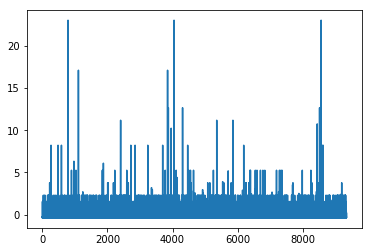

In [584]:
### haha
li_cpu=[]
li_mem=[]


from gen_expand import min_float
from gen_expand import normalize

app_cpu=env.app['cpu'].str.split('|',expand=True)
unit_v=app_cpu.astype(float).sum(axis=1).values
li_cpu.append(unit_v*np.random.randint(3,5,size=(unit_v.shape[0],)))
app_mem=env.app['mem'].str.split('|',expand=True)

li_mem.append(app_mem.astype(float).sum(axis=1).values)
def pack_plot(li,axis=0,verbose=0):
    v_=np.sum(li,axis=axis)
    p=pd.Series(v_)
    if verbose:
        p.plot()
    return v_
cpu_ret=pack_plot(li_cpu)
mem_ret=pack_plot(li_mem)
cpu_ret=normalize(cpu_ret)
cpu_init=cpu_ret
# cpu_init=cpu_ret
# cpu_ret=cpu_ret/(cpu_init+min_float(np.float16))
plt.figure()
pd.Series(cpu_ret[:]).plot()
# li_cpu_sum.append(pack_plot(li_cpu))
# li_mem_sum.append(pack_plot(li_mem))
# v_=np.random.randint(0,2,size=(unit_v.shape[0],))
# pd.Series(unit_v*v_).plot()
# /len v_

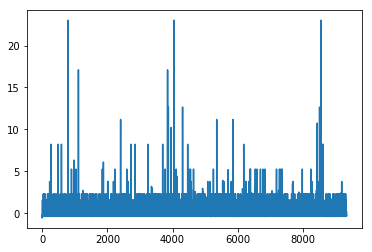

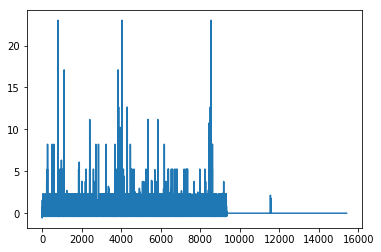

In [592]:
# begin decrease
li_mem_sum=[]
li_cpu_sum=[]
app_cpu=env.app['cpu'].str.split('|',expand=True)
unit_v=app_cpu.astype(float).sum(axis=1).values
# li_cpu.append(unit_v*np.random.randint(-4,-1,size=(unit_v.shape[0],)))
li_cpu.append(unit_v*np.identity(unit_v.shape[0])[1,:]*-1)
app_mem=env.app['mem'].str.split('|',expand=True)

li_mem.append(app_mem.astype(float).sum(axis=1).values)
cpu_ret=pack_plot(li_cpu)
mem_ret=pack_plot(li_mem)
# cpu_init=cpu_ret
# cpu_init=cpu_ret
cpu_ret=normalize(cpu_ret)
plt.figure()
pd.Series(cpu_ret[:]).plot()
li_cpu_sum.append(cpu_ret)
# li_mem_sum.append(mem_ret)
# v_=np.random.randint(0,2,size=(unit_v.shape[0],))
# pd.Series(unit_v*v_).plot()
# /len v_
# env.env_cpu.sum(axis=1).plot()
# plt.figure()
env_cpu_sum=pack_plot_max(env.env_cpu,axis=1,verbose=0)*env.mn.cpu
# env_mem_sum=pack_plot_max(env.env_mem,axis=1,verbose=1)
li_cpu_sum.append(env_cpu_sum)
li_cpu_sum.append(np.zeros(14*5))
plt.figure()
capture=np.hstack(li_cpu_sum)
pd.Series(capture).plot()

In [567]:
# %load -n pack_plot
def pack_plot_max(li,axis=0,verbose=0):
    v_=np.max(li,axis=axis)
    p=pd.Series(v_)
    if verbose:
        p.plot()
    return v_

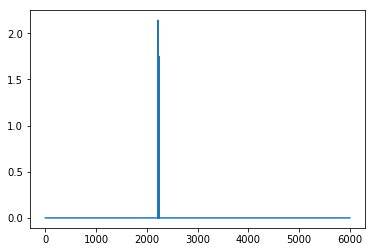

In [580]:
# pd.Series(env_cpu_sum).plot()
# pd.Series(env.env_cpu.max(axis=1)).plot()
(env_cpu_sum*env.mn.cpu).plot()

In [321]:
def get_cpu_usage(cur,res_cpu):
#     res_v=res[index]
    ps=self.app[self.col_req].iloc[cur,self.col_cpu_req].astype(float)
    if self.verbose==1:
        ps.apply(lambda x: x/res_cpu).plot()
    return ps.sum(axis=1)

In [ ]:
# %load -n env.update
    def update(self,cur,choice):
#         cur is kind of timmer
        def get_cpu_usage(cur,res_cpu):
        #     res_v=res[index]
            ps=self.app[self.col_req].iloc[cur,self.col_cpu_req].astype(float)
            if self.verbose==1:
                ps.apply(lambda x: x/res_cpu).plot()
            return ps.apply(lambda x: x/res_cpu)

        def get_mem_usage(cur,res_mem):
        #     res_v=res[index]
            ps=self.app[self.col_req].iloc[cur,self.col_mem_req].astype(float)
            if self.verbose==1:
                ps.apply(lambda x: x/res_mem).plot()
            return ps.apply(lambda x: x/res_mem)
#         op_policy=lambda cur: cur*10+1

        # s=df_machine.iloc[cur-3:cur+3][['index','cpu']]
#         choice=op_policy(cur)
        # s=df_machine.iloc[choice-3:choice+3][['index','cpu']]

        z=pd.Series(np.zeros(98))
        # v=get_cpu_usage(cur,res_cpu)
        # v=get_mem_usage(cur,res_mem)
        # map_cpu={0:z,1:v}
        # map_mem={0:z,1:v}

        s=self.mn.iloc[:][['mid','cpu','mem']]

        # self.ret_v_cpu.append(s.apply(lambda x:map_cpu[choice==x['mid']],axis=1).values)
        self.ret_v_cpu.append(s.apply(lambda x:get_cpu_usage(cur,x['cpu']) if choice==x['mid'] else z,axis=1).values)
        # self.ret_v_mem.append(s.apply(lambda x:map_mem[choice==x['mid']],axis=1).values)
        self.ret_v_mem.append(s.apply(lambda x:get_mem_usage(cur,x['mem']) if choice==x['mid'] else z,axis=1).values)
        self.ret_app_infer.append(s['mid'].apply(lambda x:self.app.aid[cur] if choice==x else '').values)

        if self.verbose==1:
            threed_view(np.sum(self.ret_v_cpu,0)[int(choice.split('_')[-1])-10:int(choice.split('_')[-1])+10,:].T,end=100)
            threed_view(np.sum(self.ret_v_mem,0)[int(choice.split('_')[-1])-10:int(choice.split('_')[-1])+10,:].T,end=100)
        # df_machine['cpu_deploy'].sum(axis=1).plot()

        return np.sum(self.ret_v_cpu,0),np.sum(self.ret_v_mem,0),np.sum(self.ret_app_infer,0)

In [7]:
# %%timeit -n 1
mid=env.mn.mid[random.randint(1,6000)]
# mid=env.mn.mid[random.randint(1,6000)]
env.evaluate(random.randint(1,9000),mid)

2216,0.08518779277796874
2216,0.0669375


2.8446249999999997

In [7]:
from policymodel import Policy
from torch.distributions import Categorical
# inp=torch.empty(size=(3,1),dtype=torch.float)
inp=torch.randn(4,36)
# m1=nn.Linear(36,125)
# m2=nn.Linear(125,10)
# m=nn.Sequential(m1,m2)
# m=Categorical(inp)
# inp=F.softmax(inp,dim=1)
m=Policy()

optimizer=optim.Adam(m.parameters())

In [ ]:
def closure():
    optimizer.zero_grad()
    inp=torch.randn(4,36)
    o=m(inp)
    # o=F.softmax(m(inp),dim=1)
    o_=Categorical(o)

    action=o_.sample()

    id_=action.dot(torch.tensor([10**3,10**2,10,1]))
    id_=id_.tolist()

    mid=env.mn.mid[id_]
    rewards,done=env.evaluate(step,mid)

In [9]:
for epoch in range(10):
    closure() 
    o_.log_prob(action)

    loss=action.to(torch.float).dot(o_.log_prob(action)*-1)*rewards

    loss.backward()
    optimizer.step()
    step=step+1

KeyError: 6724

In [1]:
%%file train.py
def gen_id(inp):
    digits=m(inp)
    # o=F.softmax(m(inp),dim=1)
#     o_=Categorical(o)
#     digits=o_.sample()
    id_=digits.dot(torch.tensor([10**3,10**2,10,1]))
    id_=id_.tolist()
    return id_
def run_game(inp,step):
    digits=m(inp)
#     print(digits)
    id_=digits.dot(torch.tensor([10**3,10**2,10,1]))
    id_=id_.tolist()
    print(id_)
    
    reward,end=env.evaluate(step,id_)
#     loss=digits.to(torch.float).dot(m.get_logprob(digits)*-1)
    loss=m.get_logprob(digits)
#     print(loss)
    ret_=torch.tensor([0],dtype=torch.float)
    for each in loss:
        ret_=ret_+each
#     print(ret_)
    m.save_logprob(ret_,reward)
    return end
    
#     loss=digits.to(torch.float).dot(m.get_logprob(digits)*-1)*rewards
    
def get_frame():
    return torch.randn(4,36)

# m.save_logprob(2,2)

def train():
    for epoch in range(10):
        m.logprob_history=[]
        m.rewards=[]
        for step in range(10000):
        # forwarding
            inp=get_frame()
            end=run_game(inp,step)
            if end:
    #             print('end')
                break
    #     print('---------------------------')
        rewards = torch.Tensor(m.rewards)
    #     print('the overall reward{}'.format(rewards))
    #     rewards = (rewards - rewards.mean()) / (rewards.std() + torch.tensor(np.finfo(np.float32).eps,dtype=torch.float))
    #     print(rewards)
        loss_li=[]
        for log_prob,r in zip(m.logprob_history,rewards):
            loss_li.append(-log_prob*r)
    #     print(m.logprob_history)
    #     print(loss_li)
        optimizer.zero_grad()
        loss = torch.cat(loss_li).sum()
        print('---------------------------')
        print(loss)
        print('---------------------------')
        loss.backward()
        optimizer.step()
        del m.logprob_history[:]
        del m.rewards[:]

Writing train.py


In [8]:
m.o_.log_prob()

Policy(
  (fc1): Linear(in_features=36, out_features=125, bias=True)
  (fc2): Linear(in_features=125, out_features=10, bias=True)
)

In [ ]:
# %load -r 37-45 /opt/playground/diaodu/model.py
return out
    def expand(self):
        [print("id:{},{}".format(id_,each.shape)) for id_,each in self.state_dict().items()]
        # pd.DataFrame.from_records(self.state_dict())
    def next(self):
        print(next(self.it))
    def init_it(self):
        self.it=iter(rnn.parameters())
    def weight_init():

In [87]:
inp

tensor([[ 1.1393],
        [-0.7889],
        [-1.3667]])

In [48]:
m=Categorical(inp)

m.sample()

tensor([ 0,  0,  0])

#### resnet

In [7]:
from torchvision.models.resnet import resnet18
r=resnet18()
h=torch.tensor(env.matrix,dtype=torch.float).view(2,-1)
h.shape

torch.Size([2, 46224])

#### util

In [54]:
# ck=torch.load('policy0_inst_6387.pth.tar')
# ck=torch.load('policy0_inst_71317.pth.tar')
# ck=torch.load('policy0_inst_74803.pth.tar')
ck=torch.load('policy0.pth.tar')
ck=torch.load('policy0_inst_8733.pth.tar')
ck=torch.load('policyquick_roll.pth.tar')

# ck=torch.load('policy8.pth.tar')

env_stat.matrix=ck['env_dic']['matrix']
env_stat.deploy_state=ck['env_dic']['deploy_state']
# mid=ck['mid']
# iid=ck['iid']
# aid=ck['aid']
# id_=ck['id_']
# state_dict=ck['state_dic']
# env_dic=ck['env_dic']
from util.gen_expand import mplot

In [34]:
t=iter(mmplot(env_stat))
t=iter(dplot(env_stat))

3 p_pm


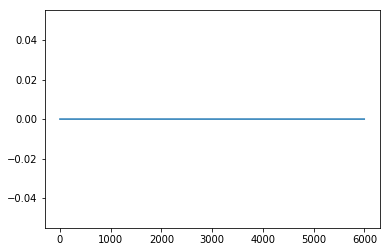

In [38]:
next(t)

In [57]:
/len env_stat.deploy_state['a'].sum()

246

In [62]:
# ck=torch.load('policy0_inst_6387.pth.tar')
# ck=torch.load('policy0_inst_71317.pth.tar')
# ck=torch.load('policy0_inst_74803.pth.tar')
ck=torch.load('policy0.pth.tar')
ck=torch.load('policy0_inst_8733.pth.tar')
# ck=torch.load('policyquick_roll.pth.tar')

# ck=torch.load('policy8.pth.tar')

env_stat.matrix=ck['env_dic']['matrix']
env_stat.deploy_state=ck['env_dic']['deploy_state']
mid=ck['mid']
iid=ck['iid']
aid=ck['aid']
# id_=ck['id_']
# state_dict=ck['state_dic']
# env_dic2=ck['env_dic']
from util.gen_expand import mplot

In [63]:
pd.DataFrame(np.vstack([iid,aid,mid]).T)

,0,1,2
0,inst_22706,app_2319,4442
1,inst_68723,app_6999,2452
2,inst_52550,app_2657,2469
3,inst_958,app_9114,3480
4,inst_46561,app_7490,3800
5,inst_17397,app_4648,5320
6,inst_43670,app_782,1339
7,inst_18148,app_1152,865
8,inst_21448,app_1356,4225
9,inst_37747,app_4055,1395


In [42]:
li=[]
[li.append(np.identity(5)[i]) for i in range(4)]

[None, None, None, None]

In [46]:
aid=pd.Series(aid)

In [49]:
pd.Series(env_stat.deploy_state['a'])

0               
1               
2               
3               
4               
5               
6               
7               
8               
9       app_3327
10              
11              
12              
13              
14              
15              
16              
17              
18              
19              
20              
21              
22              
23              
24              
25              
26              
27              
28              
29              
          ...   
5970            
5971            
5972            
5973            
5974            
5975            
5976            
5977            
5978            
5979            
5980            
5981    app_2474
5982            
5983            
5984            
5985            
5986            
5987            
5988            
5989            
5990            
5991            
5992            
5993            
5994            
5995            
5996            
5997          

In [60]:
mid=pd.Series(mid,dtype=int)
mid.sort_values()

154       9
279      11
148      57
57       59
58       82
52       83
196     130
6       166
118     180
20      222
179     249
322     260
388     260
332     260
390     260
354     260
391     260
408     260
410     260
411     260
380     270
378     270
376     270
151     270
368     270
281     291
352     291
308     291
300     291
301     291
       ... 
76     5471
251    5488
145    5525
123    5556
106    5564
316    5579
26     5607
150    5614
102    5645
36     5676
207    5744
379    5759
383    5759
404    5759
372    5759
341    5759
398    5759
245    5768
348    5789
98     5839
186    5863
187    5864
256    5871
246    5880
84     5886
60     5887
80     5910
176    5922
95     5937
164    5981
Length: 414, dtype: int64

In [73]:
m.load_state_dict(state_dict)

# pd.Series(env_stat.deploy_state[c]

In [126]:
m.next()

# m.weight_action(init='zeros')

# fail_case(env)

('net.0.bias', tensor(1.00000e-02 *
       [ 3.4084,  6.2871, -2.7755, -1.4020,  4.8732,  0.4830,  0.6369,
        -5.6734, -4.2401,  0.0118, -4.5491, -4.7102, -2.3838, -4.3502,
        -5.5037,  6.6886]))


In [66]:
t=iter(mmplot(env_stat))
t=iter(dplot(env_stat))

0 c


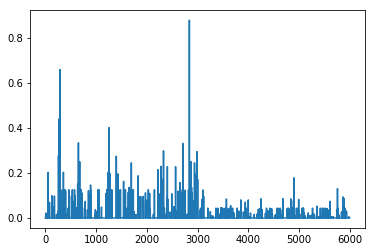

In [67]:
next(t)

In [6]:
# %load -r 166-173 ./env_stat.py
import re
def re_find(text):
    for g,v in env_stat.app_inter.groupby('aid') :
        if re.findall(g,text):
            for each in v.ab:
                if re.findall(each,text):
                    print(each)
                    return 1
    return 0

In [35]:
# env_stat.deploy_state['m'].shape==(600,)
# [print(each) for each in range(450) if mid[each]==torch.tensor([2759])]
# mid.astype(int)
env_stat.mn.iloc[1312]
# re_find(
text=(env_stat.deploy_state['a']+' ').sum()


p=re.compile('(\s+)')
text=p.sub(' ',text)

len(text.split(' '))

# %%timeit -n 2
re_find(text)

(^.*?)app_226[^( )]*?app_248


1

In [29]:
# %%timeit -n 2
re_find(text)

(^.*?)app_226[^( )]*?app_248


1

In [216]:
a=list('123')
np.array(a,dtype=object)+' '

array(['1 ', '2 ', '3 '], dtype=object)

In [4]:
unit_max(env)

c (793, 32.0)
m (4046, 128.0)
d (29, 1024.0)
p_pm (21, 1.0)
m_pm (0, 0.0)
pm (21, 1.0)


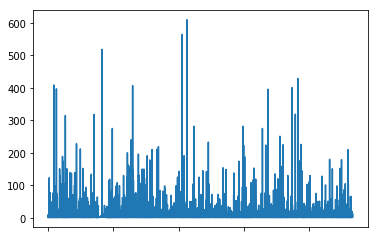

In [5]:
numplot(env)

In [6]:
mmplot(env)

<generator object mmplot at 0x7f7a4a575fc0>

#### model

In [16]:
r.fc.in_features

r.fc = nn.Linear(r.fc.in_features, 6000)

In [23]:
images=torch.randn(1,3,214,214)
r(images).shape

RuntimeError: Given groups=1, weight[64, 3, 7, 7], so expected input[1, 2, 214, 214] to have 3 channels, but got 2 channels instead

In [7]:
from policymodel import Policy
import torch
m=Policy()
# o=m(torch.tensor(env.matrix[:2],dtype=torch.float).view(8,107,-1))
# o.shape

In [1]:
%run train.py --seed 4292

/home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


KeyboardInterrupt: 

In [8]:
o.shape

torch.Size([100, 6, 10])

#### disk,pm

In [25]:
df_sum=df_ins_sum
df_sum['disk']=df_sum['disk'+'_y']/df_sum['disk'+'_x']

In [47]:
env.mn.disk.unique()

array([ 600, 1024])

In [50]:
env.app.disk.unique()

array([  60,   40, 1024,   80,  200,  600,  300,  500,  100,  167,  180,
        250,  150,  650, 1000,  120])

In [48]:
df_ins_sum['disk_y']

3485      60.0
3486      60.0
3487      60.0
3488      60.0
3489      60.0
3490      60.0
3491      60.0
3492      60.0
3493      60.0
3494      60.0
3495      60.0
3496      60.0
3497      60.0
3498      60.0
3499      60.0
3500      60.0
3501      60.0
3502      60.0
3503      60.0
3504      60.0
3505      60.0
3506      60.0
3507      60.0
3508      60.0
3509      60.0
3510      60.0
3511      60.0
3512      60.0
3513      60.0
3514      60.0
         ...  
71674     60.0
71675     60.0
71676     60.0
71677     60.0
71678     60.0
71679     60.0
71680     40.0
71681     60.0
71682     60.0
71683     60.0
71684     60.0
71685     60.0
71686     60.0
71687     60.0
71688     60.0
71689     60.0
71690     60.0
71691     60.0
71692     60.0
71693     60.0
71694    300.0
71695     60.0
71696     60.0
71697     60.0
71698     60.0
71699     60.0
71700     60.0
71701     60.0
71702     80.0
71703     60.0
Name: disk_y, Length: 68219, dtype: float64

In [ ]:
df_ins_sum['disk_x'].plot

#### log exploring

In [47]:
import pandas as pd
%matplotlib inline
import torch
# dic=torch.load('./reinforce_policy.pth.tar')
main_dic=torch.load('./policy8.pth.tar')
i=0
def pack_plot(x):
    pd.Series(x,dtype=float).plot()

In [51]:
for keys,each in main_dic.items():
#     for m in range(99):
    print(keys,len(main_dic[keys][1][1]))
#     main_dic[keys]=each[-1]
# /len dic['saved_log_probs']
# /len dic['len']

saved_log_probs 46
rewards 46


TypeError: 'int' object is not subscriptable

In [52]:
main_dic['saved_log_probs']=main_dic['saved_log_probs'][-1]
main_dic['rewards']=main_dic['rewards'][-1]

In [79]:
i=i+1
main_dic['rewards'][i]
main_dic['saved_log_probs'][i]

tensor(1.6677)

In [45]:


main_dic['saved_log_probs'][7]

[tensor([ 2.5975]),
 tensor([ 2.5378]),
 tensor([ 2.5546]),
 tensor([ 2.5227]),
 tensor([ 2.5942]),
 tensor([ 2.6813]),
 tensor([ 2.5853]),
 tensor([ 2.6722]),
 tensor([ 2.5735]),
 tensor([ 2.5105]),
 tensor([ 2.7227]),
 tensor([ 2.4069]),
 tensor([ 2.5849]),
 tensor([ 2.5551]),
 tensor([ 2.3997]),
 tensor([ 2.6558]),
 tensor([ 2.7004]),
 tensor([ 2.6781]),
 tensor([ 2.5964]),
 tensor([ 2.6237]),
 tensor([ 2.5701]),
 tensor([ 2.6783]),
 tensor([ 2.6075]),
 tensor([ 2.6106]),
 tensor([ 2.6251]),
 tensor([ 2.6488]),
 tensor([ 2.6181]),
 tensor([ 2.4860]),
 tensor([ 2.5502]),
 tensor([ 2.6763]),
 tensor([ 2.4497]),
 tensor([ 2.5064]),
 tensor([ 2.6887]),
 tensor([ 2.5917]),
 tensor([ 2.4522]),
 tensor([ 2.5215]),
 tensor([ 2.2696]),
 tensor([ 1.8627]),
 tensor([ 1.3492]),
 tensor([ 0.5095]),
 tensor([-0.9264]),
 tensor([-3.3021]),
 tensor([-7.6869]),
 tensor([-14.7137]),
 tensor([-26.2305]),
 tensor([-47.7364])]

In [161]:
i=i+1
# /len main_dic['saved_log_probs']
sum(main_dic['saved_log_probs'][(i-1)*3+1]), main_dic['saved_log_probs'][i*3+2], len(main_dic['saved_log_probs'][(i-1)*3+1]) ,len(main_dic['saved_log_probs'][i*3+1])

(tensor([ 7.4334]), tensor(-26.6393), 46, 46)

In [163]:
main_dic['saved_log_probs'][(i-1)*3+1]

[tensor([ 0.9405]),
 tensor([ 3.4683]),
 tensor([ 2.3647]),
 tensor([ 2.8770]),
 tensor([ 2.4506]),
 tensor([ 0.7081]),
 tensor([ 2.2739]),
 tensor([ 0.9402]),
 tensor([ 1.8223]),
 tensor([ 1.9372]),
 tensor([ 2.4912]),
 tensor([ 2.2741]),
 tensor([ 1.9317]),
 tensor([ 2.2847]),
 tensor([ 1.1178]),
 tensor([ 0.6516]),
 tensor([ 1.7316]),
 tensor([ 2.5461]),
 tensor([ 2.4914]),
 tensor([ 2.1698]),
 tensor([ 2.7881]),
 tensor([ 1.1185]),
 tensor([ 1.2593]),
 tensor([ 2.4506]),
 tensor([ 0.7077]),
 tensor([ 0.7077]),
 tensor([ 1.6426]),
 tensor([ 2.4272]),
 tensor([ 2.9425]),
 tensor([ 1.8919]),
 tensor([ 1.1110]),
 tensor([ 0.6438]),
 tensor([ 0.6940]),
 tensor([ 1.6803]),
 tensor([ 1.1878]),
 tensor([ 2.6539]),
 tensor([ 0.5925]),
 tensor([ 1.2159]),
 tensor([ 0.6817]),
 tensor([ 0.2627]),
 tensor([-0.5575]),
 tensor([-1.7059]),
 tensor([-7.7816]),
 tensor([-11.7747]),
 tensor([-27.2405]),
 tensor([-11.6392])]

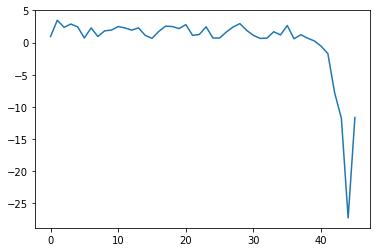

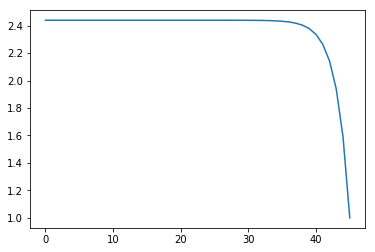

In [162]:
# plt.subplot(21)
import matplotlib.pyplot as plt
# plt.figure()
pack_plot(main_dic['saved_log_probs'][(i-1)*3+1])

plt.figure()
# plt.subplot(201)
pack_plot(main_dic['rewards'][(i-1)*2+0])

In [101]:
i=i+1
# /len main_dic['saved_log_probs']
main_dic['rewards'][(i-1)*2+1], main_dic['rewards'][i*2+1], len(main_dic['rewards'][(i-1)*2+1]) ,len(main_dic['rewards'][i*2+1])

(tensor([ 0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3000,  0.3000,  0.2999,  0.2997,
          0.2994,  0.2989,  0.2980,  0.2966,  0.2942,  0.2900,  0.2830,
          0.2712,  0.2511,  0.2170,  0.1592,  0.0614, -0.1045, -0.3857,
         -0.8623, -1.6702, -3.0393, -5.3600]),
 tensor([ 0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,  0.3001,
          0.3001,  0.3001,  0.3001,  0.3000,  0.3000,  0.2999,  0.2997,
          0.2994,  0.2989,  0.2980,  0.2966,  0.2942,  0.2900,  0.2830,
          0.2712,  0.2511,  0.2170,  0.1592,  0.0614, -0.1045, -0.3857,
         -0.8623, -1.6702, -3.0393, -5.3600]),
 46,
 46)

In [2]:
%%timeit -n 5
print(m(get_frame()))
# print('y')

tensor([ 2,  2,  5,  7])
tensor([ 3,  7,  2,  8])
tensor([ 8,  3,  9,  1])
tensor([ 8,  5,  0,  2])
tensor([ 6,  0,  1,  8])
tensor([ 3,  7,  8,  9])
tensor([ 0,  9,  6,  1])
tensor([ 8,  4,  2,  9])
tensor([ 7,  0,  1,  7])
tensor([ 7,  8,  6,  1])
tensor([ 7,  9,  2,  1])
tensor([ 9,  1,  1,  2])
tensor([ 0,  6,  6,  3])
tensor([ 1,  3,  5,  0])
tensor([ 9,  9,  4,  9])
tensor([ 4,  6,  2,  9])
tensor([ 7,  5,  5,  9])
tensor([ 0,  6,  2,  6])
tensor([ 6,  9,  4,  6])
tensor([ 1,  6,  8,  0])
tensor([ 3,  2,  4,  4])
tensor([ 4,  3,  9,  8])
tensor([ 0,  3,  6,  5])
tensor([ 8,  9,  8,  4])
tensor([ 4,  4,  6,  4])
tensor([ 4,  3,  5,  7])
tensor([ 4,  2,  6,  6])
tensor([ 9,  3,  6,  5])
tensor([ 4,  8,  5,  5])
tensor([ 7,  6,  4,  5])
tensor([ 0,  2,  0,  5])
tensor([ 8,  1,  6,  5])
tensor([ 1,  5,  6,  5])
tensor([ 9,  7,  2,  5])
tensor([ 2,  5,  5,  3])
15.2 ms ± 666 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [10]:
# %%timeit -n 1
env.evaluate(793,np.random.randint(1,6000))

(1, 0)

In [2]:
train()

2307
49.669
9.972900211811094
7897
---------------------------
tensor(28.5918)
---------------------------
6543
---------------------------
tensor(14.3002)
---------------------------
5297
49.669
9.972900211811094
3722
49.669
9.972900211811094
734
49.669
9.972900211811094
3522
49.669
9.972900211811094
7598
---------------------------
tensor(168.0445)
---------------------------
2370
49.669
9.972900211811094
8167
---------------------------
tensor(114.9300)
---------------------------
2728
49.669
9.972900211811094
9532
---------------------------
tensor(143.4590)
---------------------------
6168
---------------------------
tensor(71.8438)
---------------------------
6244
---------------------------
tensor(71.8275)
---------------------------
1793
49.669
9.972900211811094
8486
---------------------------
tensor(172.1464)
---------------------------
4452
49.669
9.972900211811094
4255
49.669
9.972900211811094
269
49.669
9.972900211811094
6395
---------------------------
tensor(407.1882)
--

In [78]:
get_frame().sum()

tensor(3.7697e+07)

In [53]:
m.expand()

id:conv1.weight,torch.Size([16, 8, 3, 3])
id:conv1.bias,torch.Size([16])
id:bn1.weight,torch.Size([16])
id:bn1.bias,torch.Size([16])
id:bn1.running_mean,torch.Size([16])
id:bn1.running_var,torch.Size([16])
id:conv2.weight,torch.Size([32, 16, 3, 3])
id:conv2.bias,torch.Size([32])
id:bn2.weight,torch.Size([32])
id:bn2.bias,torch.Size([32])
id:bn2.running_mean,torch.Size([32])
id:bn2.running_var,torch.Size([32])
id:fc1.weight,torch.Size([4, 128])
id:fc1.bias,torch.Size([4])
id:fc2.weight,torch.Size([1, 28])
id:fc2.bias,torch.Size([1])
id:fc3.weight,torch.Size([10, 99])
id:fc3.bias,torch.Size([10])
id:net.0.weight,torch.Size([16, 8, 3, 3])
id:net.0.bias,torch.Size([16])
id:net.1.weight,torch.Size([16])
id:net.1.bias,torch.Size([16])
id:net.1.running_mean,torch.Size([16])
id:net.1.running_var,torch.Size([16])
id:net.2.weight,torch.Size([32, 16, 3, 3])
id:net.2.bias,torch.Size([32])
id:net.3.weight,torch.Size([32])
id:net.3.bias,torch.Size([32])
id:net.3.running_mean,torch.Size([32])
id:net.

In [3]:
m.weight_action(init='zeros')

{}

In [21]:
m.next()

('fc3.bias', tensor(1.00000e-03 *
       [-4.9989, -5.8103,  4.8906,  4.7217, -3.8054, -1.4494, -1.4602,
         4.6051,  0.5381, -2.4086]))


In [3]:
m.init_it()